# 1. Literature Survey

## 1.1 Introduction to Travel Recommendation Systems

Travel recommendation systems aim to suggest destinations, attractions, or experiences tailored to users' preferences. With the exponential growth of travel data and user-generated content, AI-driven recommendation systems have become increasingly popular in platforms such as TripAdvisor, Airbnb, and Google Travel.

The fundamental goal of such systems is to help users efficiently discover places of interest based on their historical behavior, stated preferences, or contextual factors like budget, time, location, or season. These systems reduce the information overload and personalize the travel experience.

## 1.2 Traditional Techniques

### 1.2.1 Content-Based Filtering
This approach uses item features (such as destination type, location, and price) to recommend similar items to those the user has liked in the past. For example, if a user prefers temples in southern India with minimal entry fees, the system suggests similar religious places.

**Advantages:**
- No need for user interaction data
- Effective for cold-start scenarios

**Limitations:**
- Limited diversity in recommendations
- Can't learn from similar users' preferences

### 1.2.2 Collaborative Filtering
This technique uses the behavior and preferences of similar users to make recommendations. If User A and User B like the same places, the system assumes User A will like what User B likes next.

**Advantages:**
- Learns complex user-item relationships
- Offers novel and diverse recommendations

**Limitations:**
- Requires a large amount of user feedback data
- Suffers from cold-start and sparsity problems

## 1.3 Modern AI-Based Techniques

### 1.3.1 Artificial Neural Networks (ANN)
ANNs can model non-linear and complex interactions between features, making them suitable for data with diverse attributes like type, location, ratings, and accessibility. In travel recommendation, ANNs can predict a "relevance score" or classification label for each place given user preferences as input.

**Why ANN?**
- Handles mixed-type data (numerical + categorical)
- Learns complex patterns without explicit rules
- Scalable and generalizable

### 1.3.2 Convolutional Neural Networks (CNN)
CNNs are typically used for spatial and image data. If travel photos or visual context (e.g., scenery images) were available, CNNs could be useful for aesthetic-based recommendations. However, this dataset lacks image input, making CNNs irrelevant here.

### 1.3.3 Recurrent Neural Networks (RNN), LSTM, GRU
These sequence-based models are suited for time-series data or sequential interactions (e.g., user's trip timeline). Since this dataset doesn't involve temporal user activity or sequential travel logs, RNNs, LSTMs, and GRUs are not a good fit.

### 1.3.4 Reinforcement Learning
This technique learns optimal policies through feedback (rewards). It's suitable for real-time recommendation systems that adapt based on user interactions (e.g., clicks or purchases). Since we lack interactive feedback in this static dataset, reinforcement learning is not applicable.

### 1.3.5 Federated Learning
Useful in privacy-sensitive or decentralized data environments (e.g., multiple user devices). It allows models to be trained locally and aggregated globally. This is not applicable to a single centralized dataset like ours.

### 1.3.6 Expert Systems
Rule-based systems encode expert knowledge to suggest destinations. For example, "If user wants religious + south + low budget → Recommend Temples in Tamil Nadu." While simple and interpretable, expert systems are static and not adaptable to changing preferences or large datasets.


## 1.4 Conclusion of Literature Review

Considering the structure and characteristics of the dataset:
- It is **tabular**, contains **no images**, **no sequential** or **real-time feedback** data.
- ANN is the **most appropriate code-based model** for implementing a scalable, data-driven recommendation engine.
- The model can predict a **suitability score** for each destination given user preferences and rank destinations accordingly.

# 2. Dataset Description

## 2.1 Overview

This dataset is a **curated exploration guide** that encompasses **must-visit destinations across India**. It has been designed as a comprehensive resource for travelers, tourists, and cultural enthusiasts. With a strong focus on diversity, the dataset includes places from all over India, covering **historical**, **religious**, **environmental**, and **cultural** categories.

The dataset can be used not only for data visualization and exploration but also to implement AI models that recommend suitable places to users based on their preferences.

## 2.2 Dataset Objective

The core objective of the dataset is to serve as a **recommendation guide**. Whether a traveler is looking for temples, nature parks, monuments, or historical places, the dataset helps identify relevant destinations based on various parameters like cost, accessibility, ratings, and visit duration.

## 2.3 Column Descriptions

| Column | Description |
|--------|-------------|
| **Zone** | Geographical region of the place within India (e.g., Northern, Southern, Eastern, Western, Central). Useful for regional filtering. |
| **State** | The Indian state where the destination is located. Adds administrative and cultural context. |
| **City** | The specific city or town that hosts the destination. Helps with route planning and local logistics. |
| **Name** | The actual name of the tourist attraction. Acts as the primary identifier. |
| **Type** | Classification of the destination (e.g., Temple, War Memorial, Natural Park). Critical for user interest-based filtering. |
| **Establishment Year** | The year the destination was built, discovered, or opened. Adds historical depth and aids in significance filtering. |
| **Time Needed to Visit (hrs)** | Estimated number of hours required for a full visit. Useful for users with time constraints. |
| **Google Review Rating** | Average user rating out of 5 on Google, indicating popularity and satisfaction. Helps rank destinations. |
| **Entrance Fee in INR** | Admission cost in Indian Rupees. Important for users planning based on budget. |
| **Airport within 50km Radius** | Indicates whether there’s an airport nearby (Yes/No). A measure of accessibility. |
| **Weekly Off** | The day of the week the place is closed. Helps avoid unavailable visits. |
| **Significance** | The primary reason the place is important (e.g., Historical, Religious, Environmental). Enhances semantic filtering. |
| **DSLR Allowed** | States whether DSLR cameras are permitted, useful for photography enthusiasts. |
| **Number of Google Reviews (in lakhs)** | Popularity metric indicating the volume of public engagement. Helps gauge real-world relevance. |
| **Best Time to Visit** | Indicates the recommended part of the day (Morning, Afternoon, Evening) for optimal experience. Useful for planning the day effectively. |


## 2.4 Conclusion

The dataset is rich in features and covers essential aspects of travel destinations. It is ideal for implementing a recommendation system using **Artificial Neural Networks (ANN)**, as it contains well-structured and varied data without requiring temporal or image-based models.

# 3. Exploratory Data Analysis and Data Preprocessing

## 3.1 Importing Libraries

In [ ]:
!pip install keras-tuner -q
!pip install keras-tuner --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
import seaborn as sns
import math
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt


In [ ]:
# pandas display setting
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 200)

## 3.2 Importing the Dataset

In [ ]:
df_travel = pd.read_csv('/content/Travel Recommendation Dataset.csv')

In [ ]:
df_travel.shape

(325, 13)

In [ ]:
display(df_travel.head())
display(df_travel.tail())

Zone  State   City          Type  time needed to visit in hrs  \
0  Northern  Delhi  Delhi  War Memorial                          0.5   
1  Northern  Delhi  Delhi          Tomb                          2.0   
2  Northern  Delhi  Delhi        Temple                          5.0   
3  Northern  Delhi  Delhi    Theme Park                          2.0   
4  Northern  Delhi  Delhi   Observatory                          2.0   

   Google review rating  Entrance Fee in INR Airport with 50km Radius  \
0                   4.6                    0                      Yes   
1                   4.5                   30                      Yes   
2                   4.6                   60                      Yes   
3                   4.1                   50                      Yes   
4                   4.2                   15                      Yes   

  Weekly Off   Significance DSLR Allowed  Number of google review in lakhs  \
0        NaN     Historical          Yes                              2.60   
1        NaN     Historical          Yes                              0.40   
2        NaN      Religious           No                              0.40   
3     Monday  Environmental          Yes                              0.27   
4        NaN     Scientific          Yes                              0.31   

  Best Time to visit  
0            Evening  
1          Afternoon  
2          Afternoon  
3            Evening  
4            Morning

Zone           State         City    Type  \
320   Western         Gujarat  Gandhinagar  Temple   
321   Central   Uttar Pradesh         Agra    Fort   
322   Central  Madhya Pradesh       Bhopal  Museum   
323  Northern       Rajasthan       Jaipur  Palace   
324  Northern       Rajasthan       Jaipur  Museum   

     time needed to visit in hrs  Google review rating  Entrance Fee in INR  \
320                          3.0                   4.6                    0   
321                          2.0                   4.5                   40   
322                          2.0                   4.7                   10   
323                          2.0                   4.4                  200   
324                          2.0                   4.5                  200   

    Airport with 50km Radius Weekly Off Significance DSLR Allowed  \
320                      Yes     Monday    Religious           No   
321                      Yes        NaN   Historical          Yes   
322                      Yes     Monday     Cultural          Yes   
323                      Yes        NaN   Historical          Yes   
324                      Yes        NaN   Historical          Yes   

     Number of google review in lakhs Best Time to visit  
320                              0.18                All  
321                              1.30          Afternoon  
322                              0.15                All  
323                              0.51            Morning  
324                              0.63                All

In [ ]:
df_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Zone                              325 non-null    object 
 1   State                             325 non-null    object 
 2   City                              325 non-null    object 
 3   Type                              325 non-null    object 
 4   time needed to visit in hrs       325 non-null    float64
 5   Google review rating              325 non-null    float64
 6   Entrance Fee in INR               325 non-null    int64  
 7   Airport with 50km Radius          325 non-null    object 
 8   Weekly Off                        32 non-null     object 
 9   Significance                      325 non-null    object 
 10  DSLR Allowed                      325 non-null    object 
 11  Number of google review in lakhs  325 non-null    float64
 12  Best Tim

In [ ]:
# categorical features
list_categorical_features = [
    'Zone', 'State', 'City', 'Type',
    'Airport with 50km Radius', 'Weekly Off',
    'Significance', 'DSLR Allowed', 'Best Time to visit'
]
df_travel[list_categorical_features] = df_travel[list_categorical_features].astype('category')
df_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Zone                              325 non-null    category
 1   State                             325 non-null    category
 2   City                              325 non-null    category
 3   Type                              325 non-null    category
 4   time needed to visit in hrs       325 non-null    float64 
 5   Google review rating              325 non-null    float64 
 6   Entrance Fee in INR               325 non-null    int64   
 7   Airport with 50km Radius          325 non-null    category
 8   Weekly Off                        32 non-null     category
 9   Significance                      325 non-null    category
 10  DSLR Allowed                      325 non-null    category
 11  Number of google review in lakhs  325 non-null    float64 

In [ ]:
# descriptive statistics

# numerical
display(df_travel.describe().round(3).T)

# categorical
display(df_travel.describe(include = ['object', 'bool', 'category']).T)

count     mean      std   min    25%   50%  \
time needed to visit in hrs       325.0    1.808    0.971  0.50  1.000  1.50   
Google review rating              325.0    4.486    0.275  1.40  4.400  4.50   
Entrance Fee in INR               325.0  115.809  530.860  0.00  0.000  0.00   
Number of google review in lakhs  325.0    0.408    0.647  0.01  0.059  0.17   

                                   75%     max  
time needed to visit in hrs        2.0     7.0  
Google review rating               4.6     4.9  
Entrance Fee in INR               40.0  7500.0  
Number of google review in lakhs   0.5     7.4

count unique            top freq
Zone                       325      6       Southern   98
State                      325     33  Uttar Pradesh   23
City                       325    214          Delhi   16
Type                       325     78         Temple   59
Airport with 50km Radius   325      2            Yes  227
Weekly Off                  32      5         Monday   23
Significance               325     25     Historical   78
DSLR Allowed               325      2            Yes  265
Best Time to visit         325      6            All  165

## 3.3 Data Cleaning

### 3.3.1 Handling Missing/Null Values

In [ ]:
# missing values
df_travel.isnull().sum()

Zone                                  0
State                                 0
City                                  0
Type                                  0
time needed to visit in hrs           0
Google review rating                  0
Entrance Fee in INR                   0
Airport with 50km Radius              0
Weekly Off                          293
Significance                          0
DSLR Allowed                          0
Number of google review in lakhs      0
Best Time to visit                    0
dtype: int64

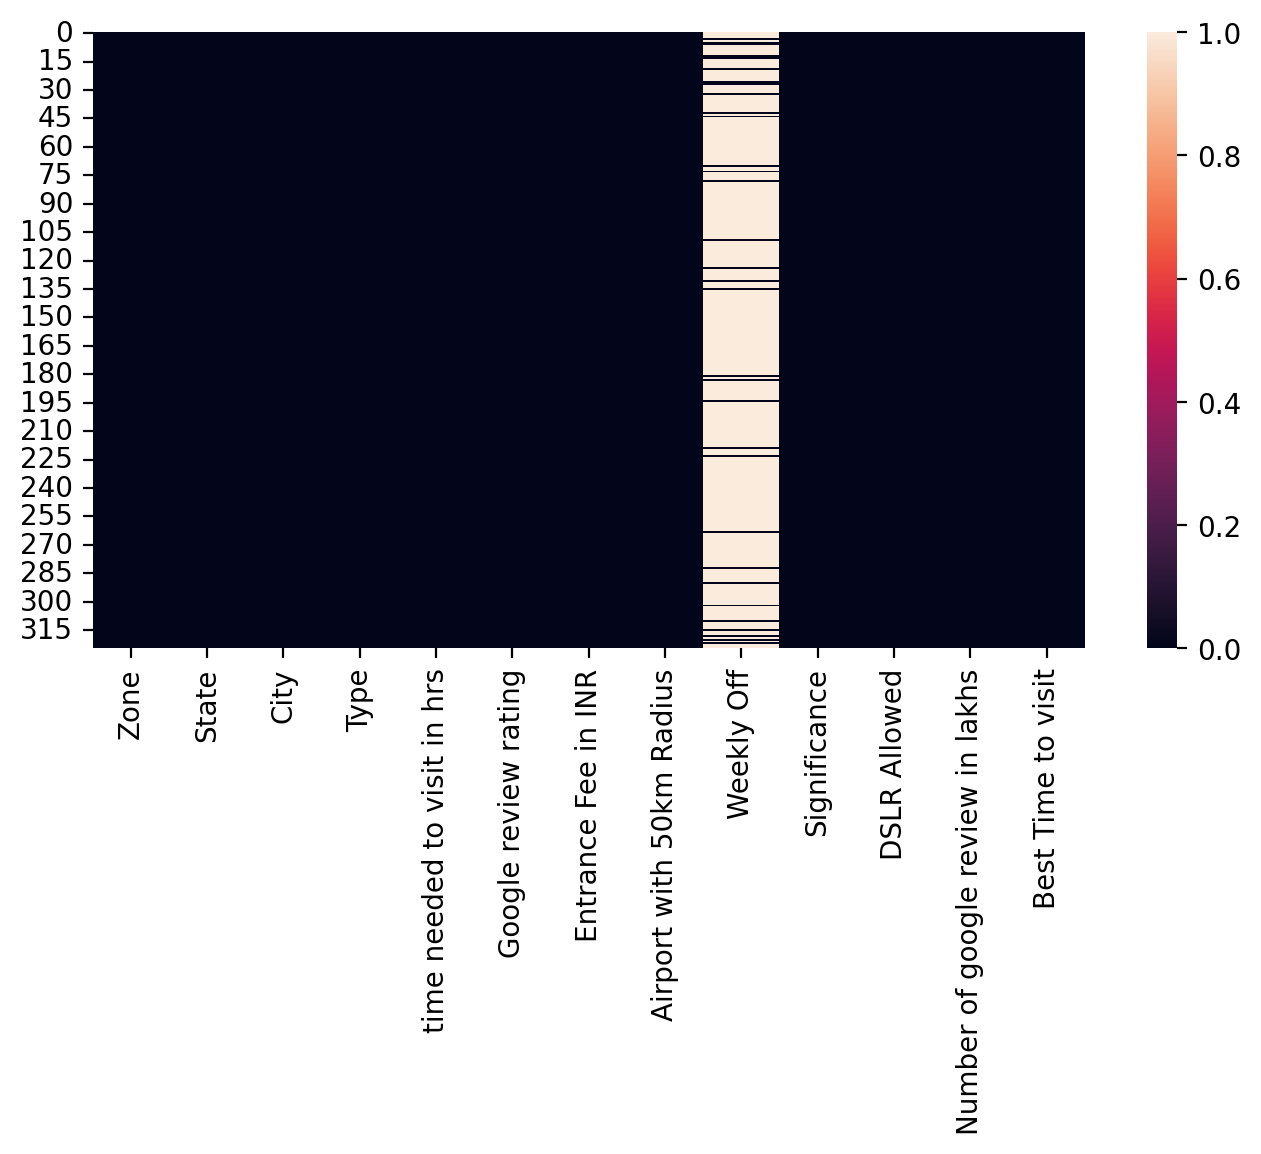

In [ ]:
plt.figure(figsize = (8, 4), facecolor = "white")

sns.heatmap(
    df_travel.isnull(), vmin = 0, vmax = 1
)

plt.show()

**Note** - Only the variable **Weekly Off** contains missing values and it has so many missing values. Therefore out of the techniques of handling missing values, deleting the column is the best technique.

In [ ]:
# dropping columns containing missing values
df_travel = df_travel.drop(['Weekly Off'], axis = 1)

### 3.3.2 Treating Duplicate Records

In [ ]:
# duplicated rows
df_travel.loc[df_travel.duplicated()]

Empty DataFrame
Columns: [Zone, State, City, Type, time needed to visit in hrs, Google review rating, Entrance Fee in INR, Airport with 50km Radius, Significance, DSLR Allowed, Number of google review in lakhs, Best Time to visit]
Index: []

**Note** - There are no duplicated rows in the dataset.

## 3.4 Univariate Analysis

In [ ]:
def summary_numerical_dist(df_data, col, q_min=0.01, q_max=0.99):
    fig = plt.figure(figsize=(12, 8), facecolor="white")

    layout_plot = (2, 2)
    axes = []

    # Create 4 subplots
    for i in range(4):
        axes.append(plt.subplot2grid(layout_plot, (i // 2, i % 2)))

    # Histogram with KDE
    sns.histplot(data=df_data, x=col, kde=True, ax=axes[0])
    axes[0].set_title("Histogram")

    # QQ Plot
    stats.probplot(df_data[col].dropna(), dist="norm", plot=axes[1])
    axes[1].set_title("QQ Plot")

    # Boxplot
    sns.boxplot(data=df_data, x=col, ax=axes[2])
    axes[2].set_title("Boxplot")

    # Outlier quantile plot
    pts = df_data[col].quantile(q=np.arange(q_min, q_max, 0.01))
    sns.lineplot(x=pts.index, y=pts.values, ax=axes[3])
    axes[3].set_title("Outlier Quantile Trend")
    axes[3].set_xlabel("Quantile")
    axes[3].set_ylabel(col)
    axes[3].grid(True)

    plt.suptitle(f"Distribution of: {col}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [ ]:
def summary_categorical_dist(df_data, col):

    fig = plt.figure(figsize = (8, 4), facecolor = "white")

    layout_plot = (1, 2)
    num_subplot = 2
    axes = [None for _ in range(num_subplot)]
    list_shape_subplot = [[(0, 0), (0, 1)], [1, 1], [1, 1]]
    for i in range(num_subplot):
        axes[i] = plt.subplot2grid(
            layout_plot, list_shape_subplot[0][i],
            rowspan = list_shape_subplot[1][i],
            colspan = list_shape_subplot[2][i]
        )

    count = df_data[col].value_counts().sort_index()

    sns.countplot(data = df_data, y = col, order = count.index, ax = axes[0])
    axes[1].pie(data = df_data, x = count, labels = count.index, autopct = '%1.1f%%', startangle = 90)

    list_title = ["Counts", "Proportions"]
    for i in range(num_subplot):
        axes[i].set_title(list_title[i])
    plt.suptitle(f"Distribution of: {col}", fontsize = 15)
    plt.tight_layout()
    plt.show()

### 3.4.1 Numerical Variables

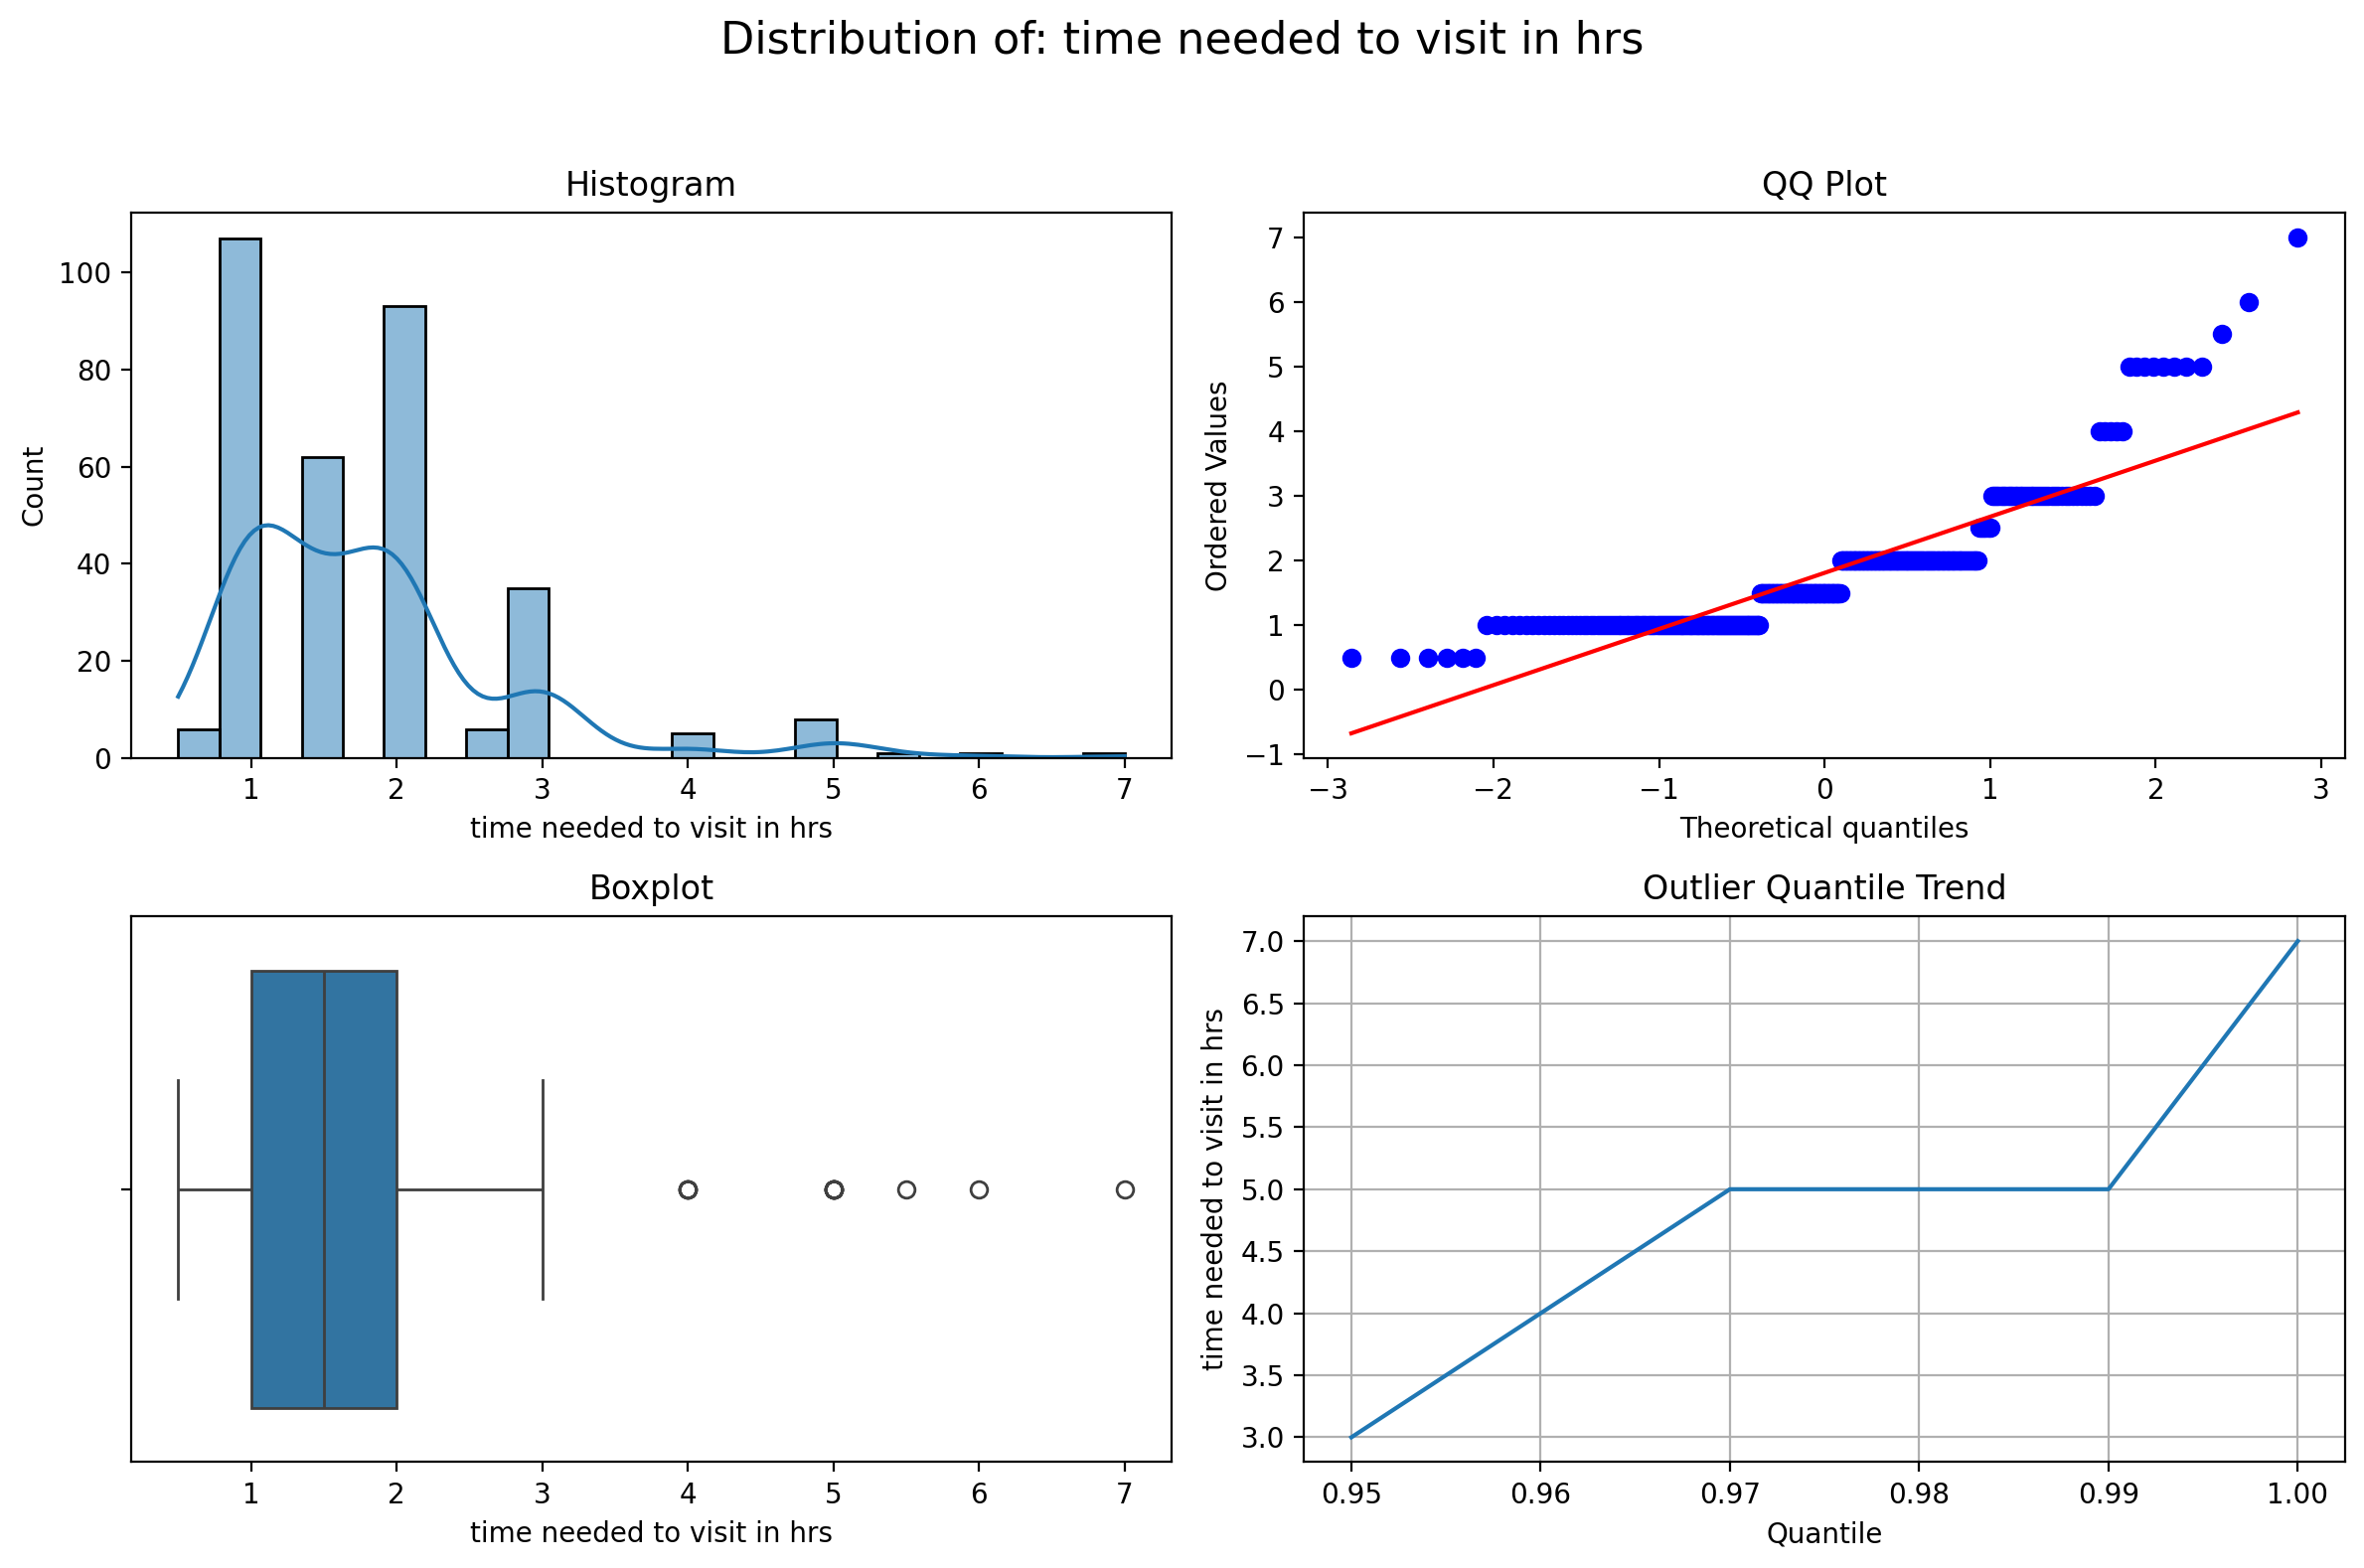

In [ ]:
summary_numerical_dist(df_travel, 'time needed to visit in hrs', .95, 1)

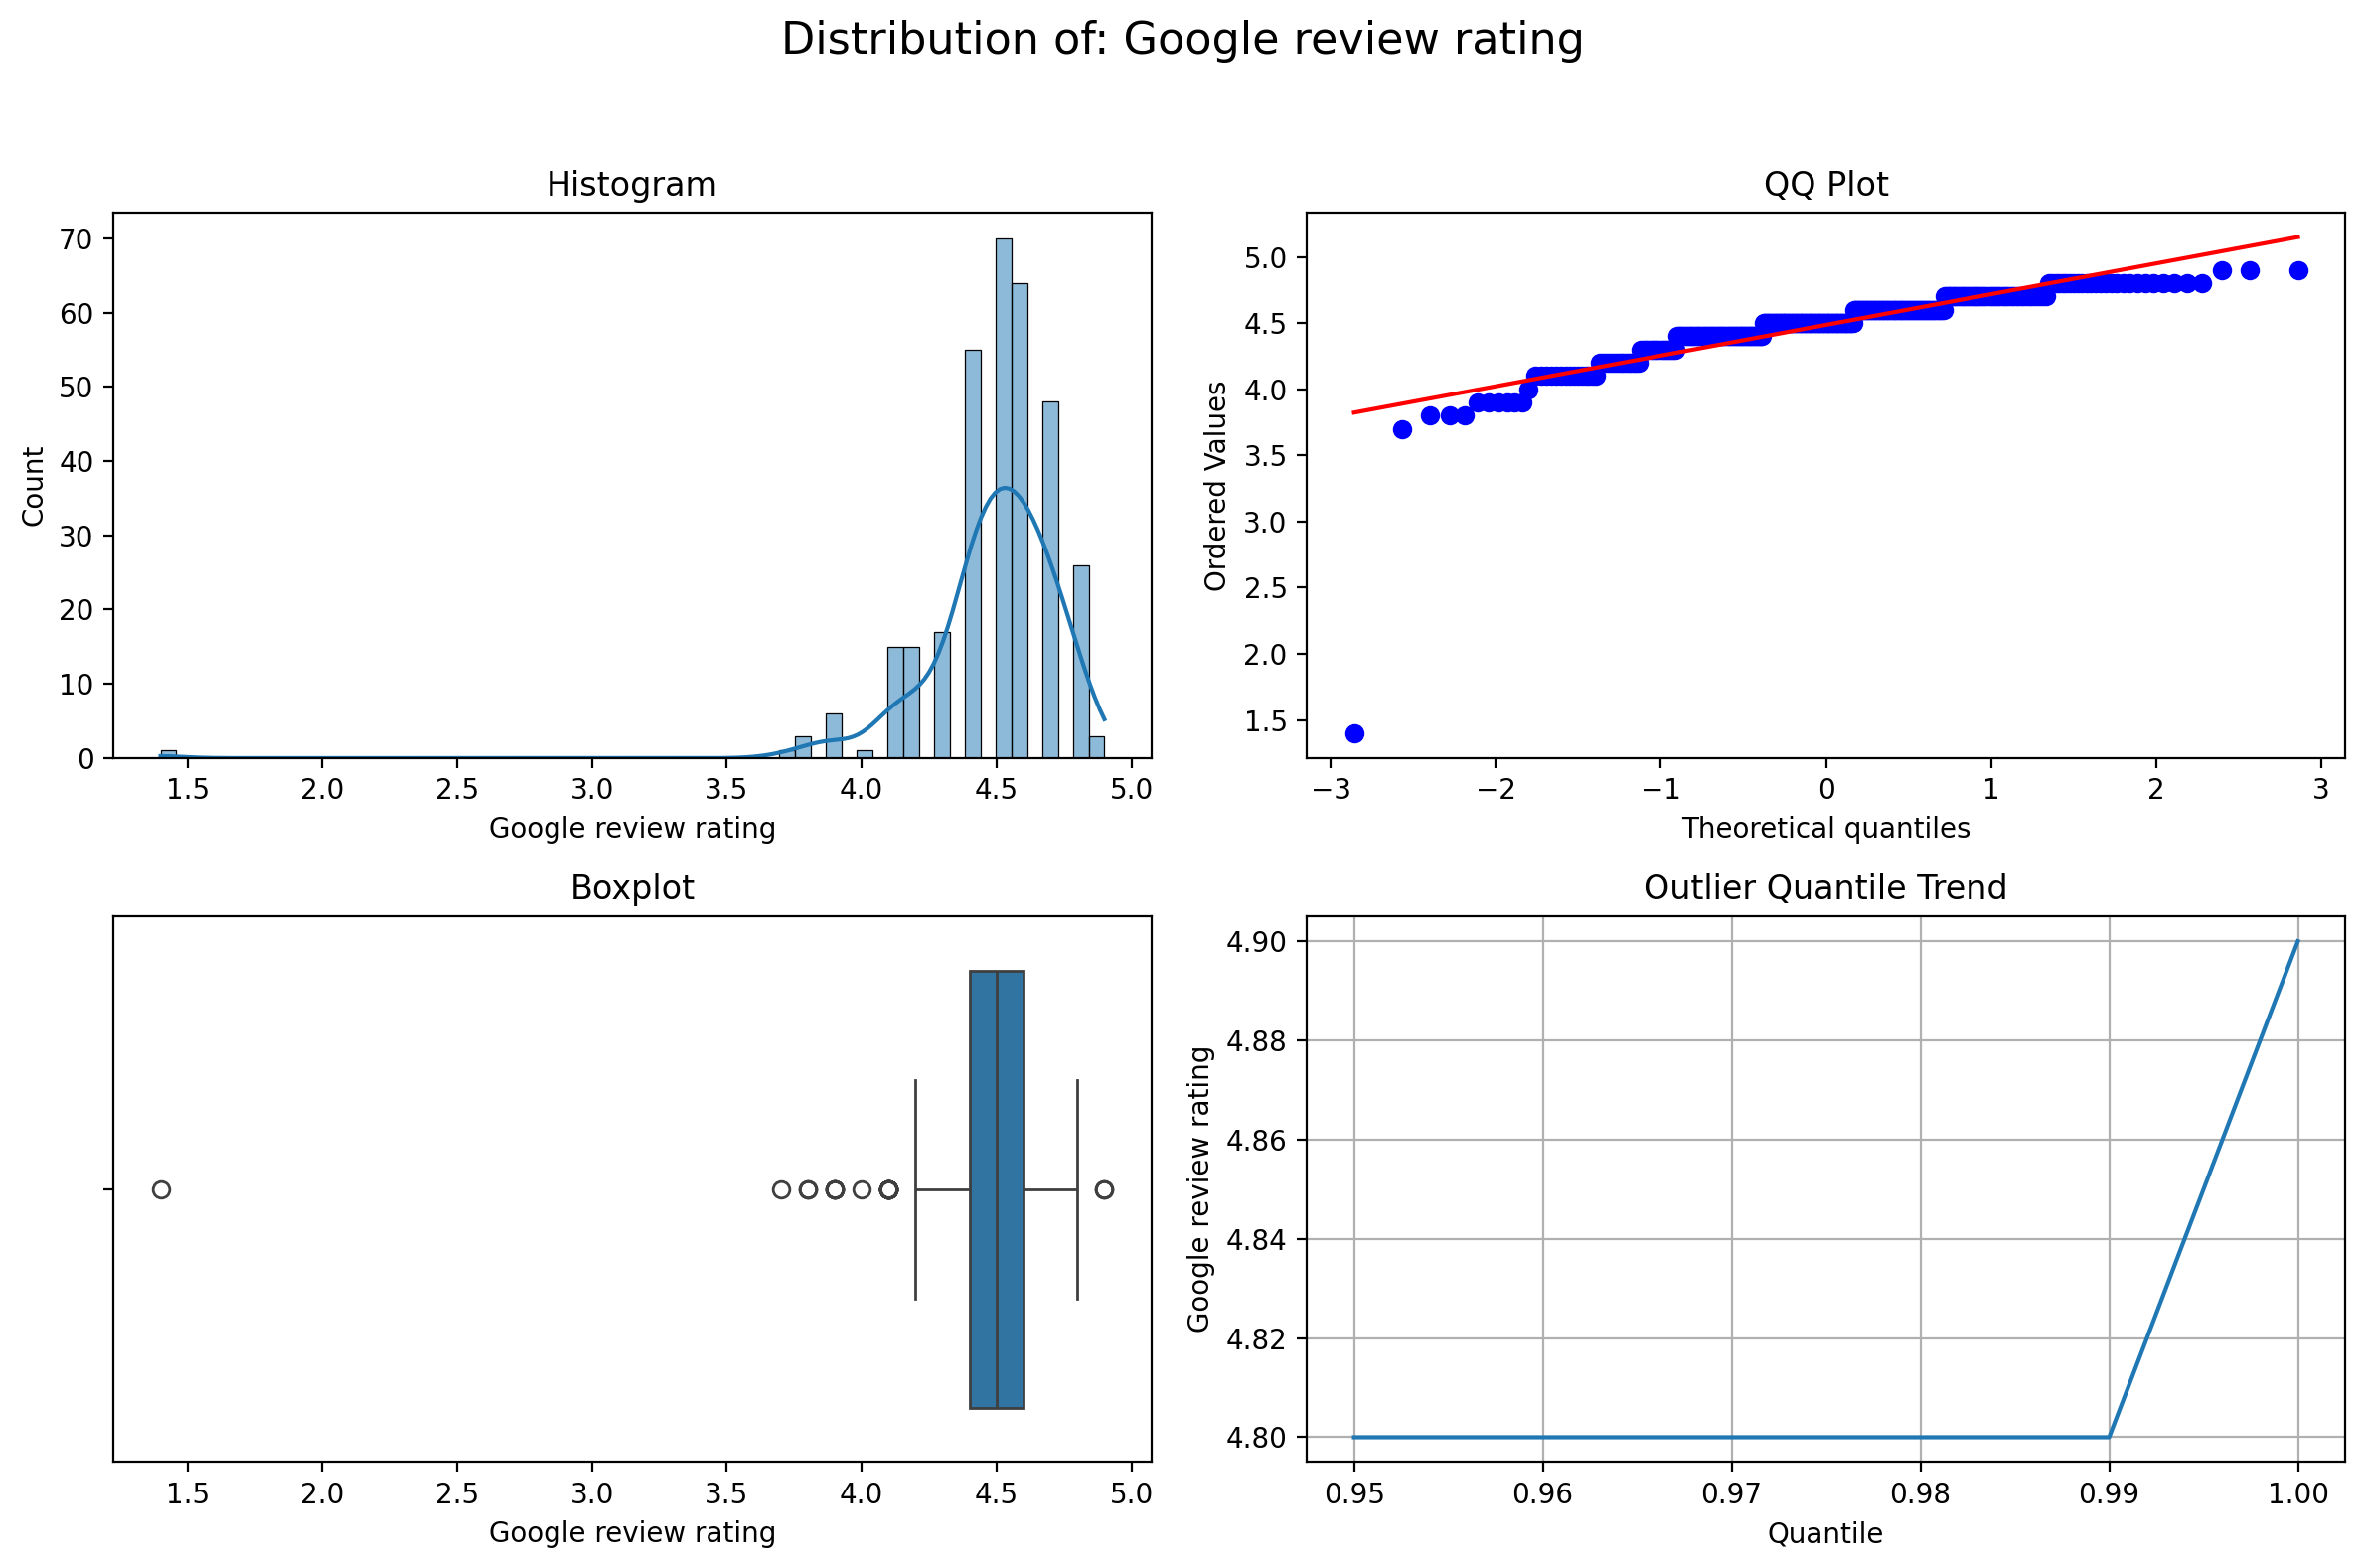

In [ ]:
summary_numerical_dist(df_travel, 'Google review rating', .95, 1)

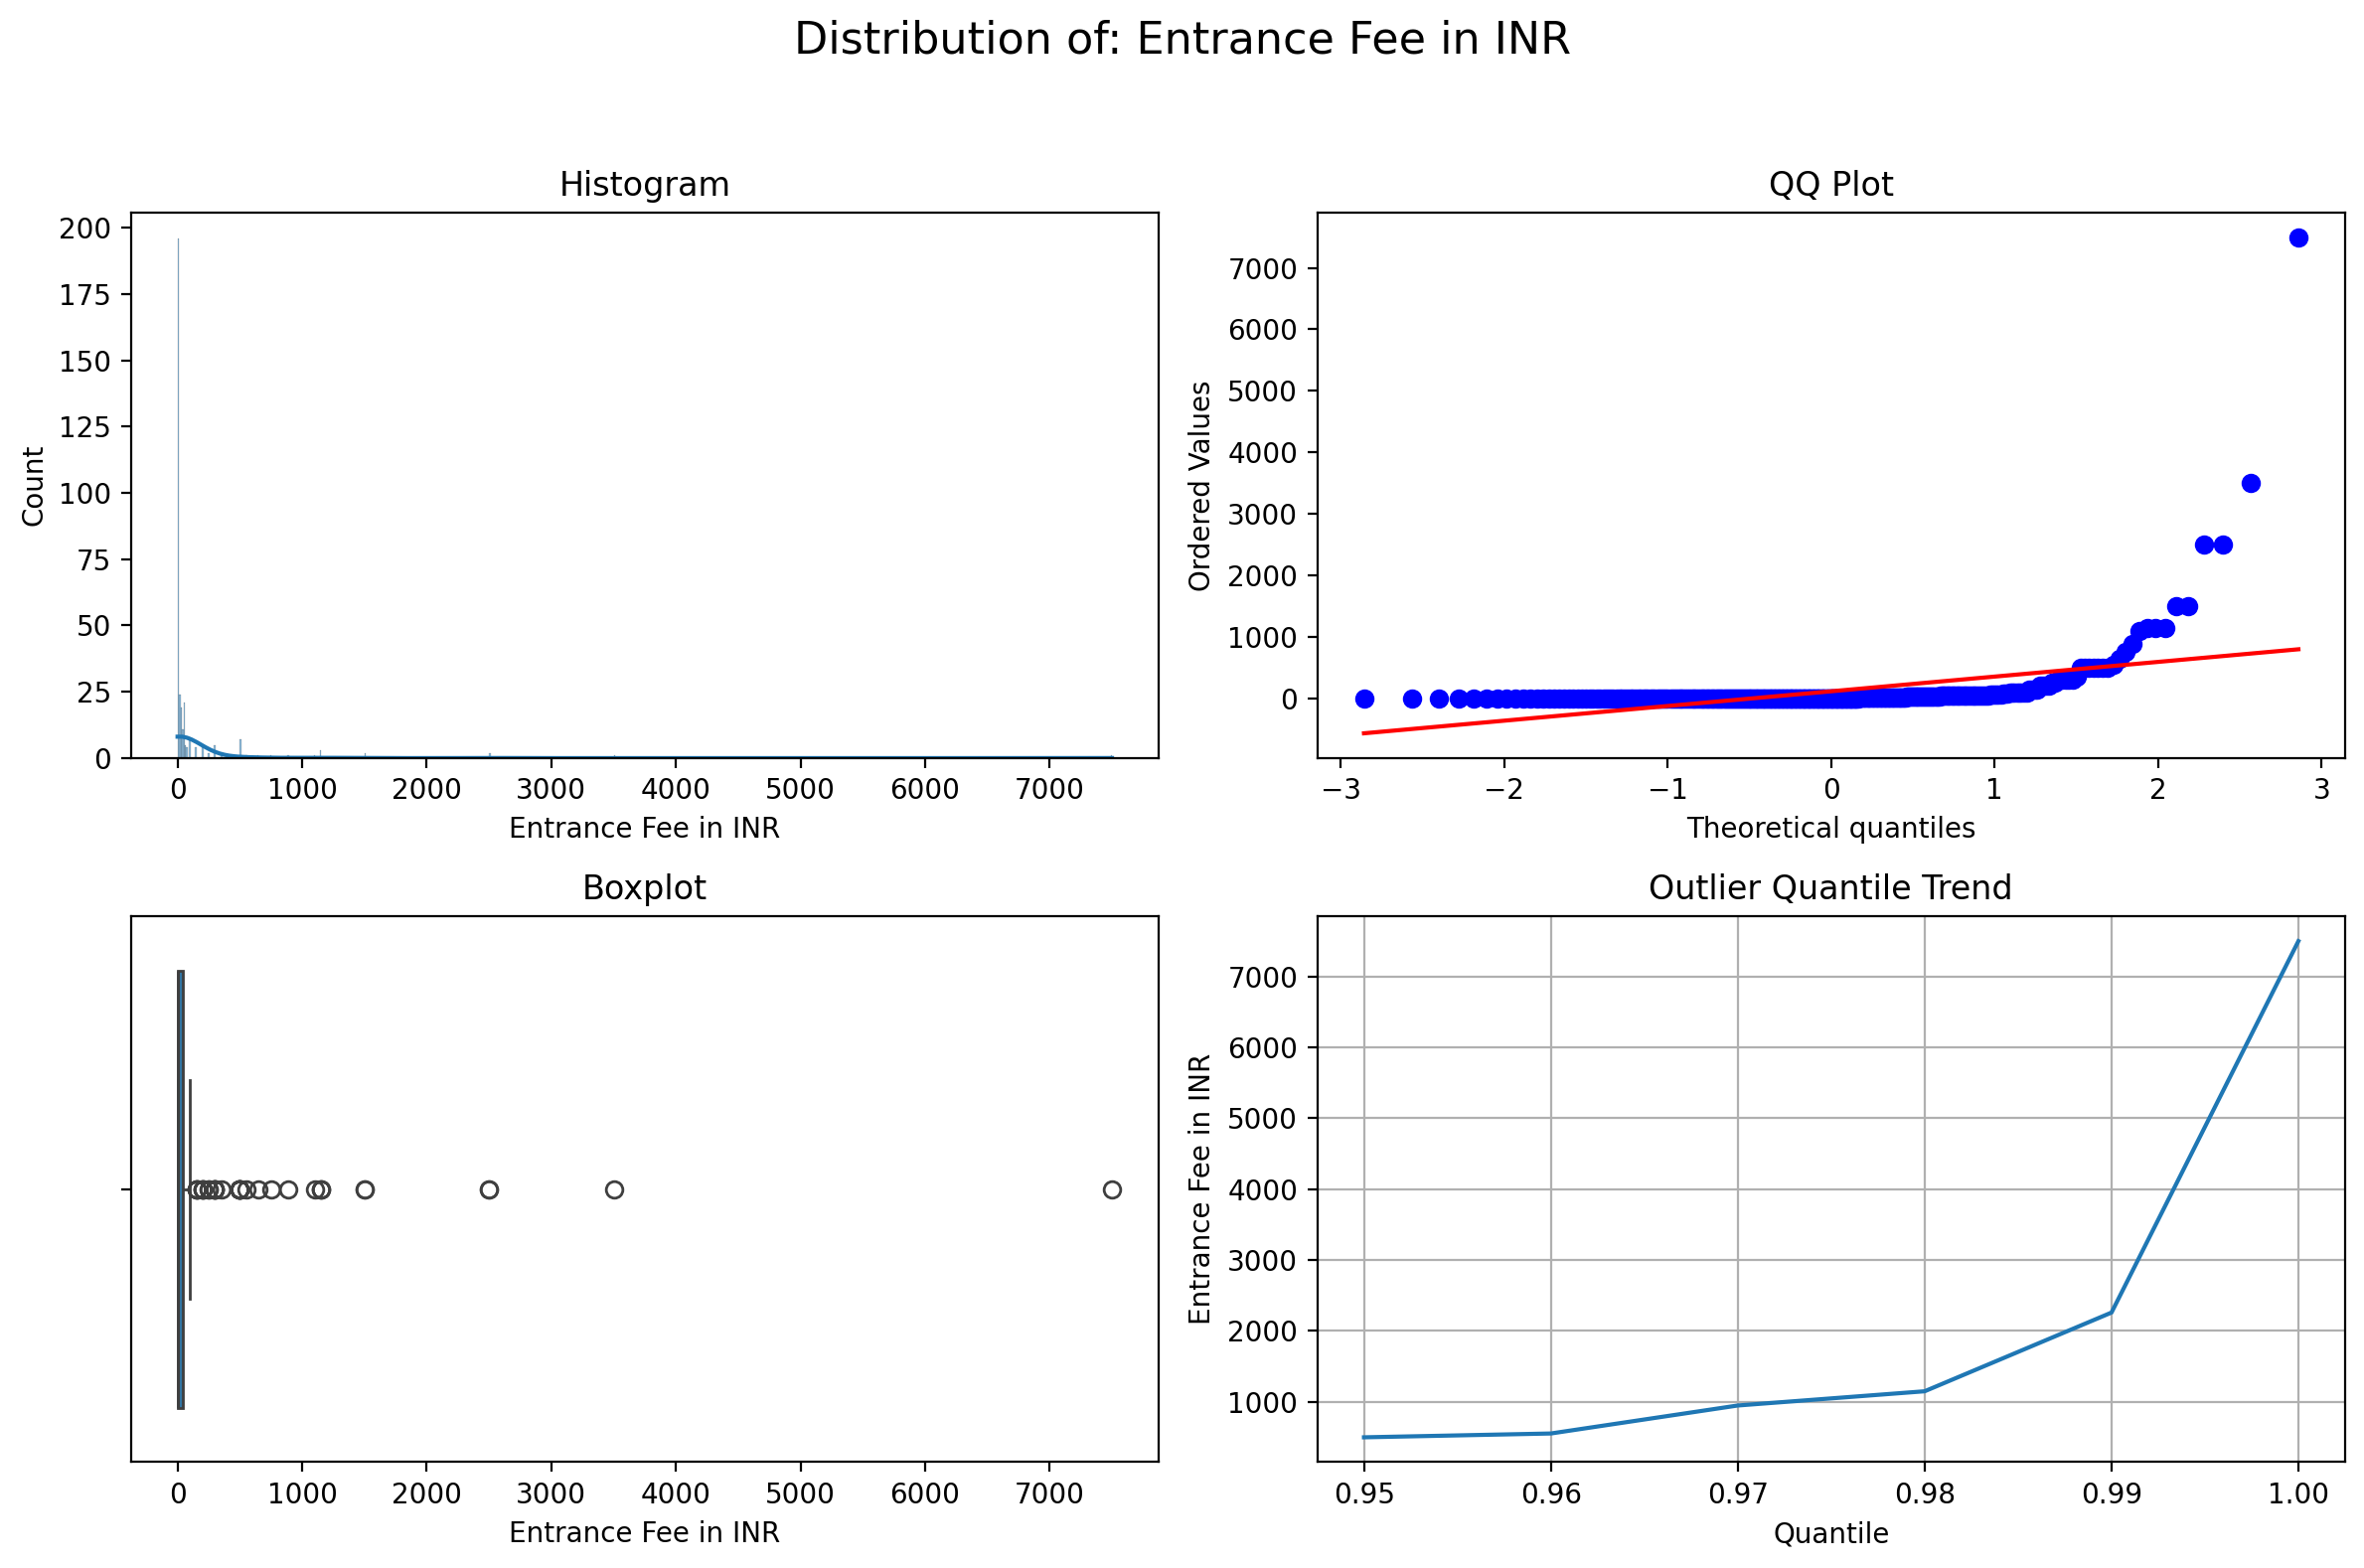

In [ ]:
summary_numerical_dist(df_travel, 'Entrance Fee in INR', .95, 1)

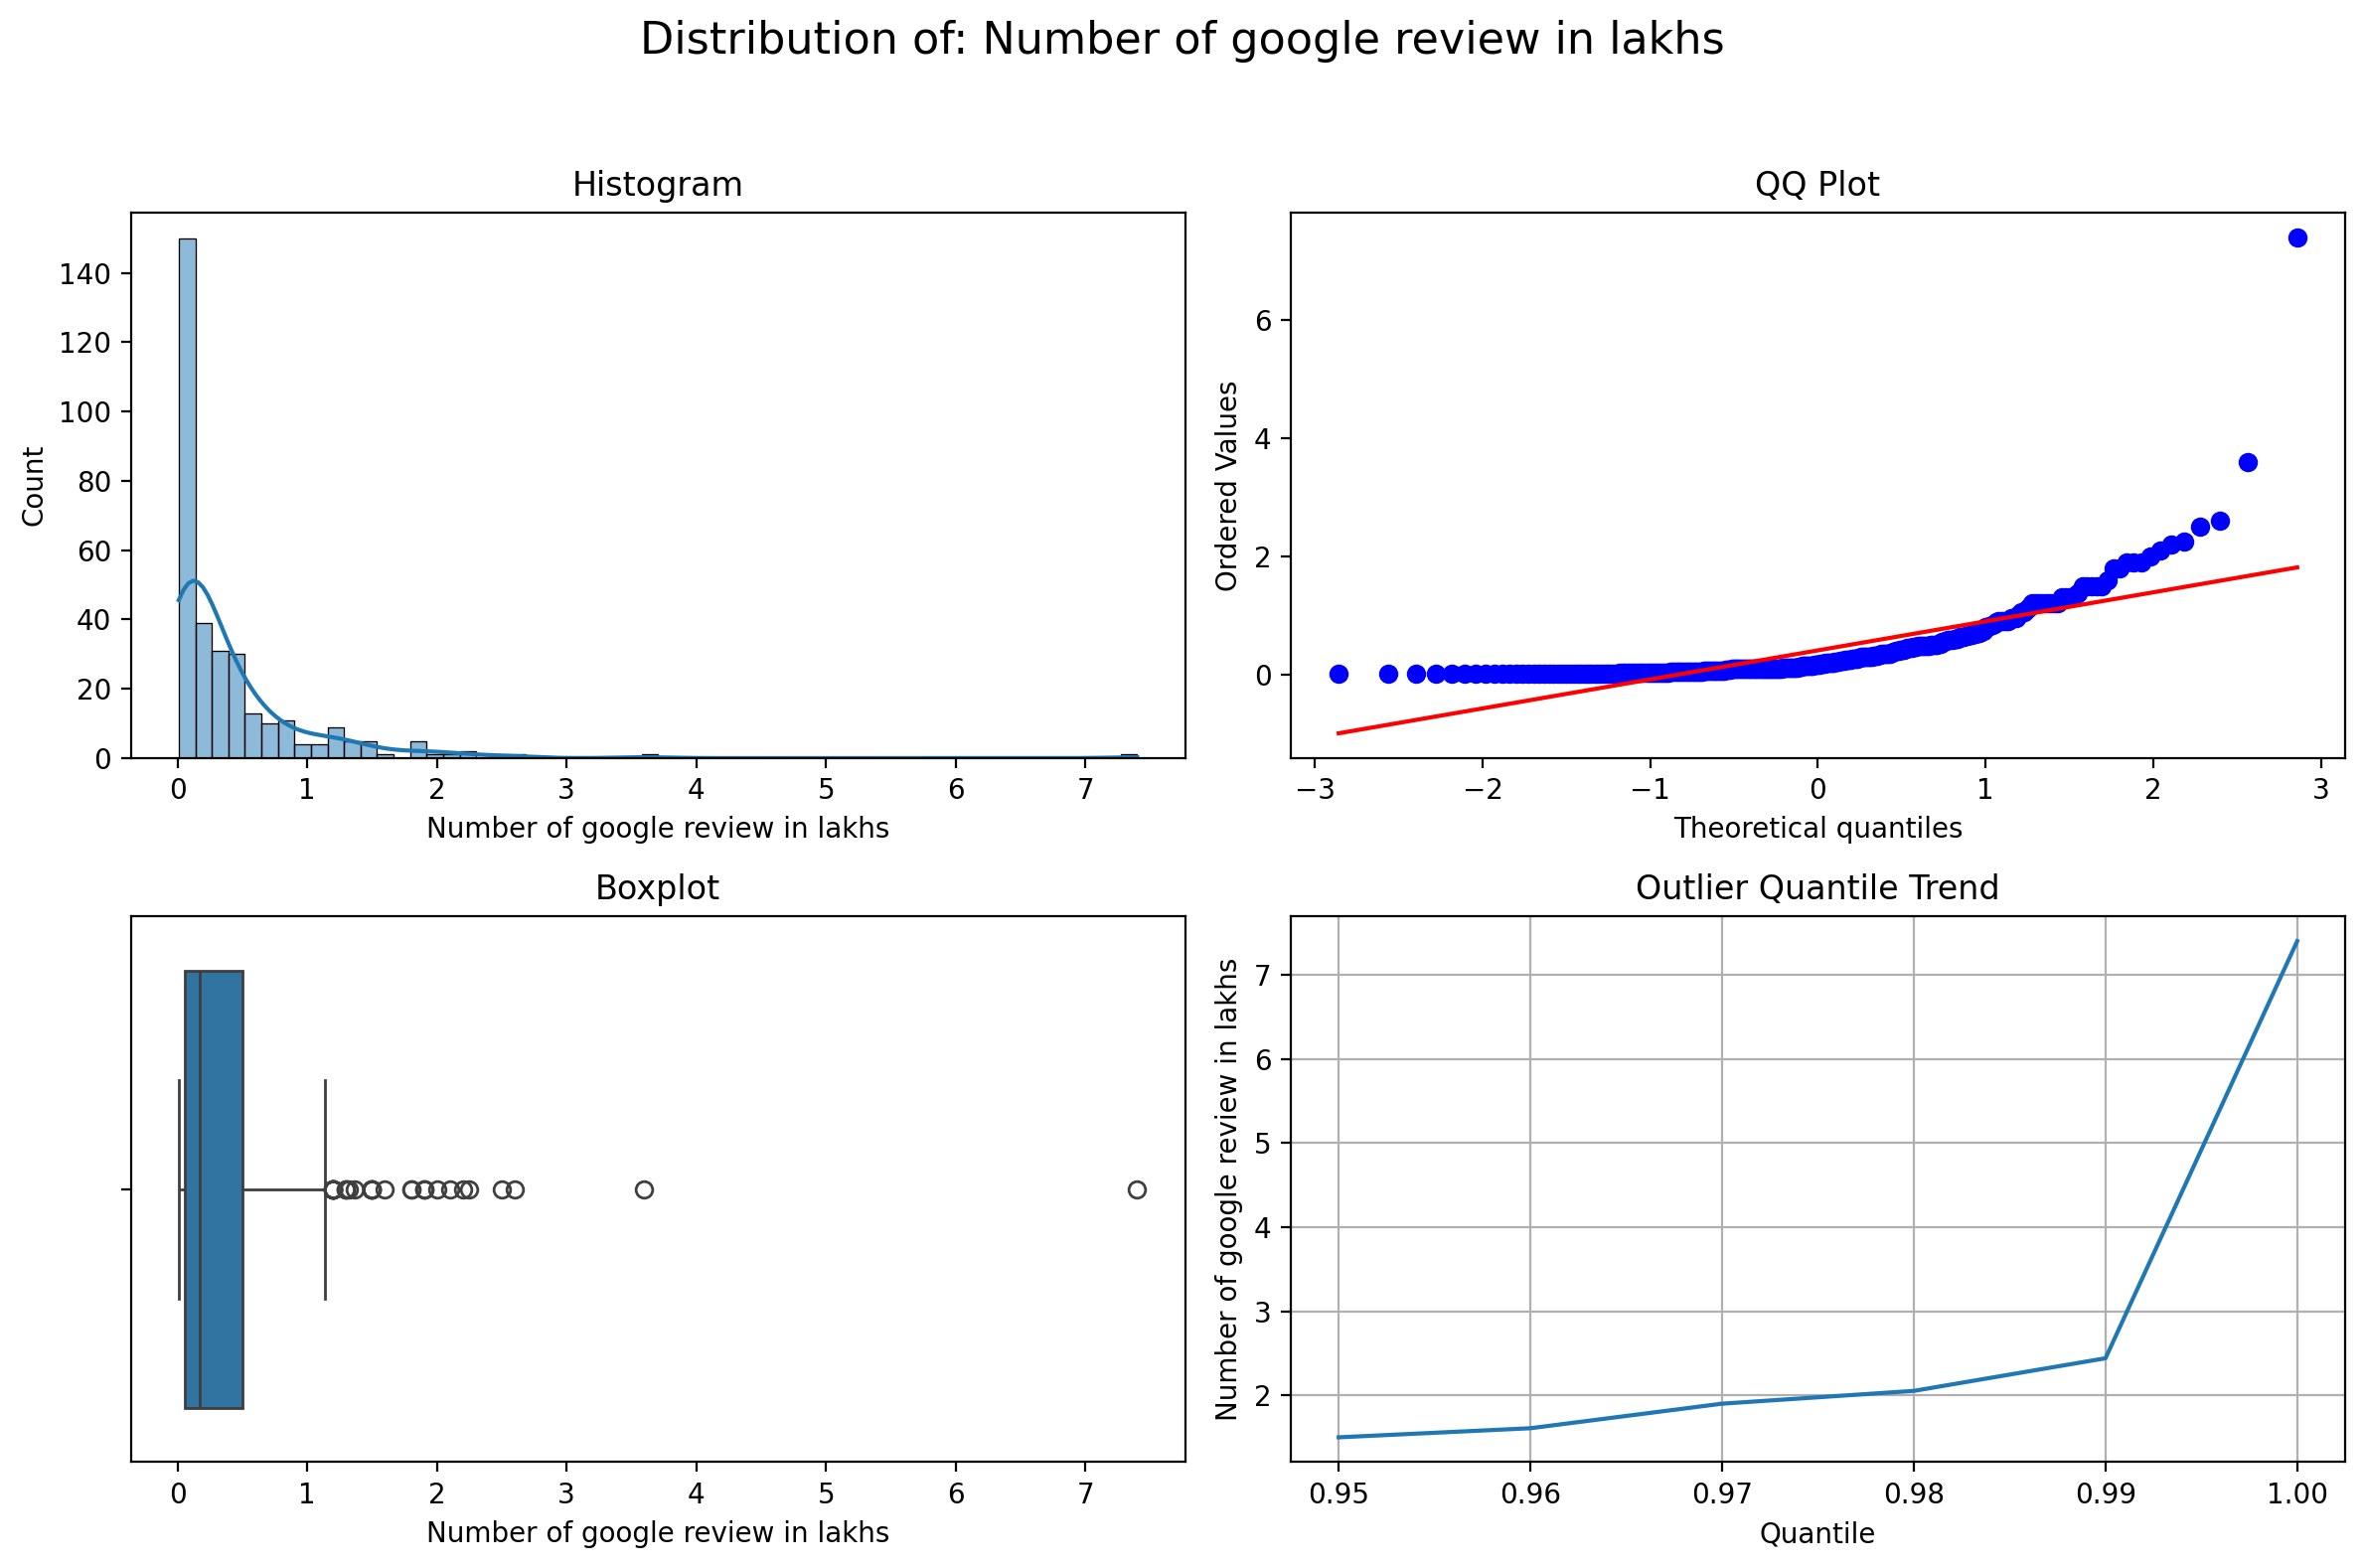

In [ ]:
summary_numerical_dist(df_travel, 'Number of google review in lakhs', .95, 1)

**Note** - This is a multi-class classification problem. So outliers can be present in the dataset and no need of removing them.

### 3.4.2 Categorical Variables

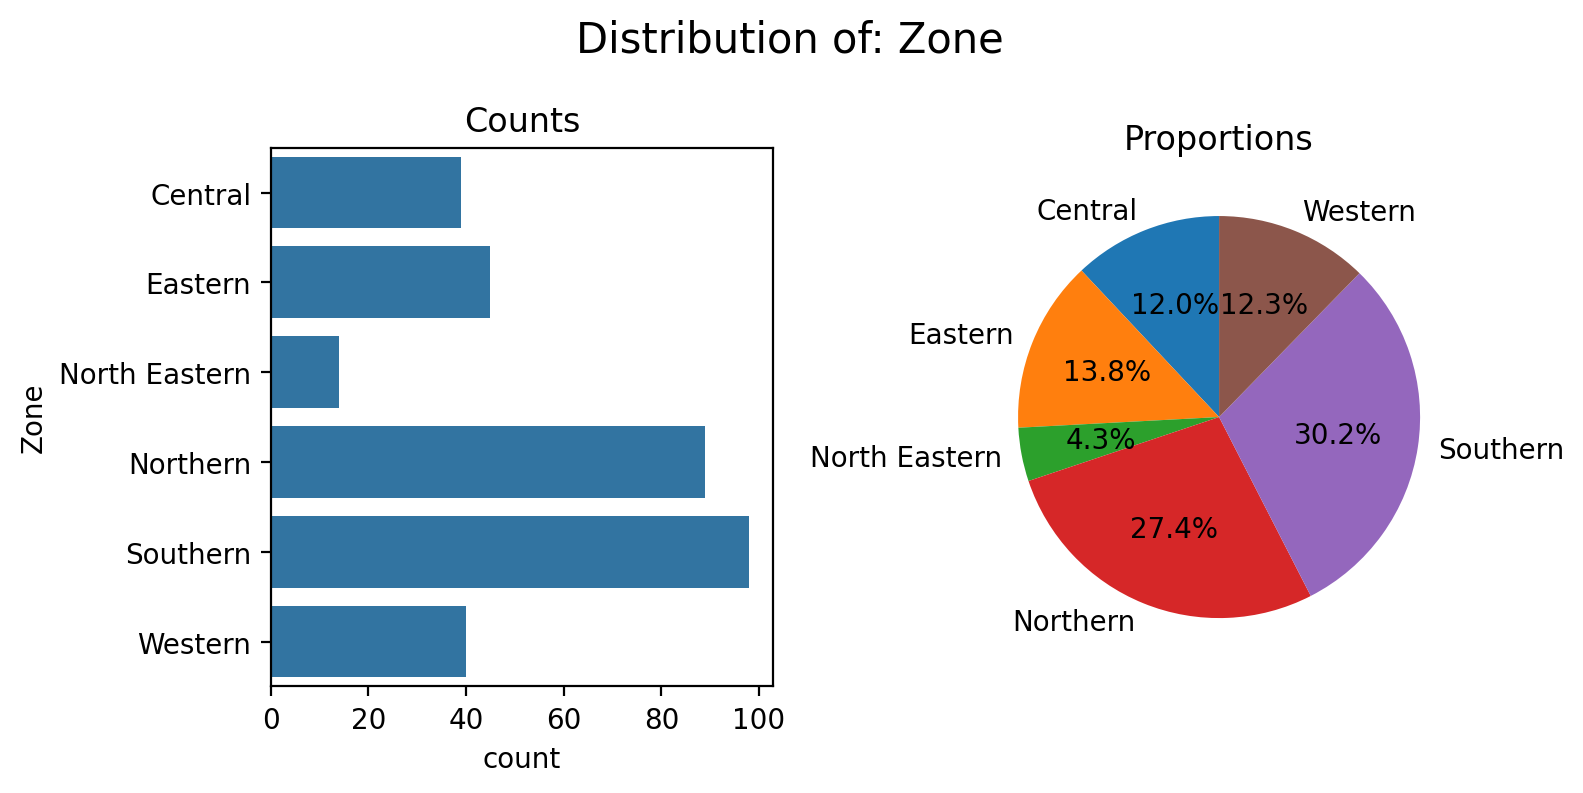

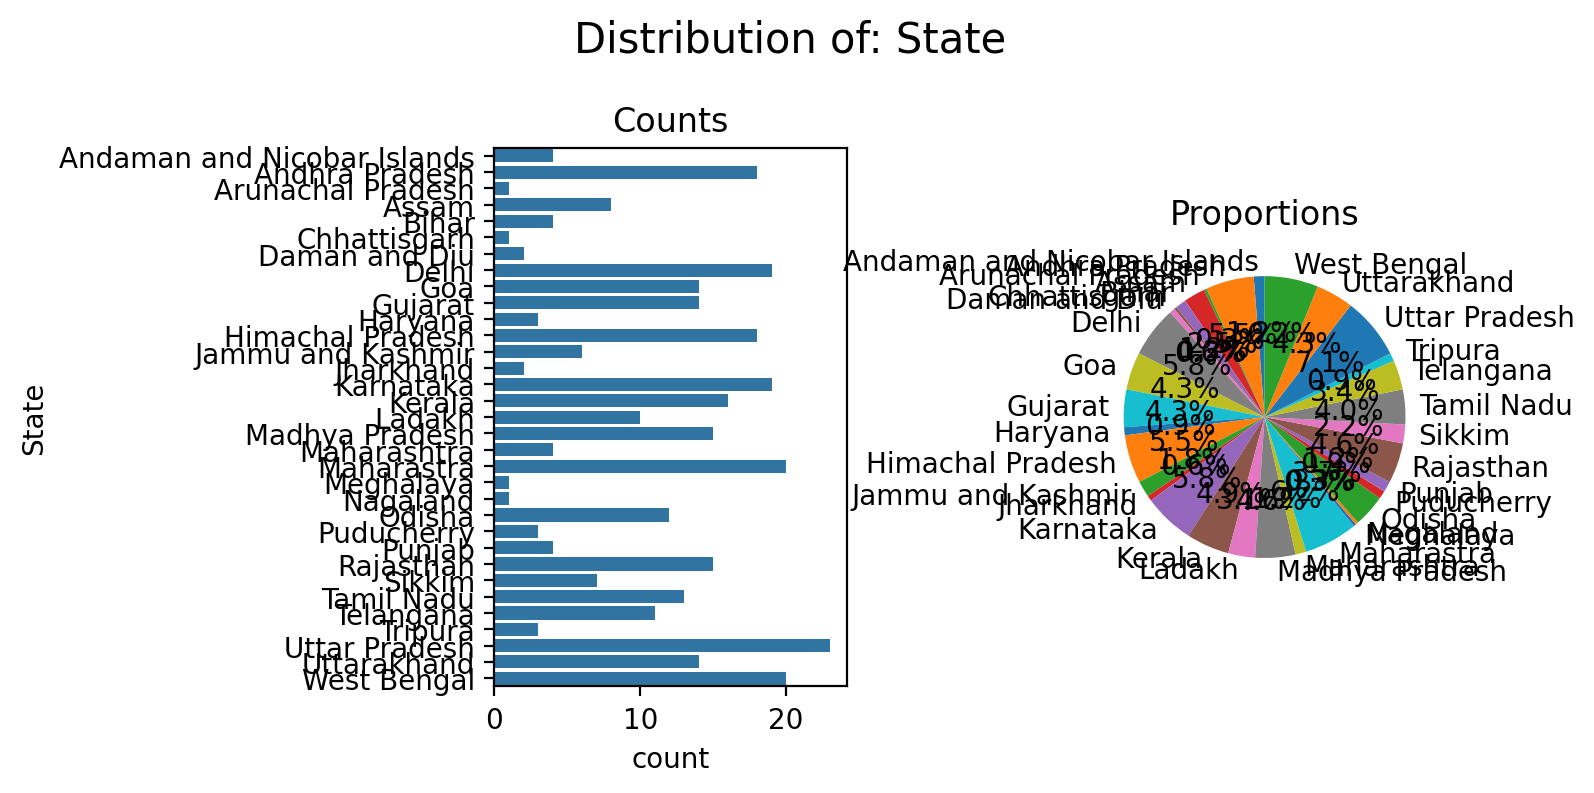

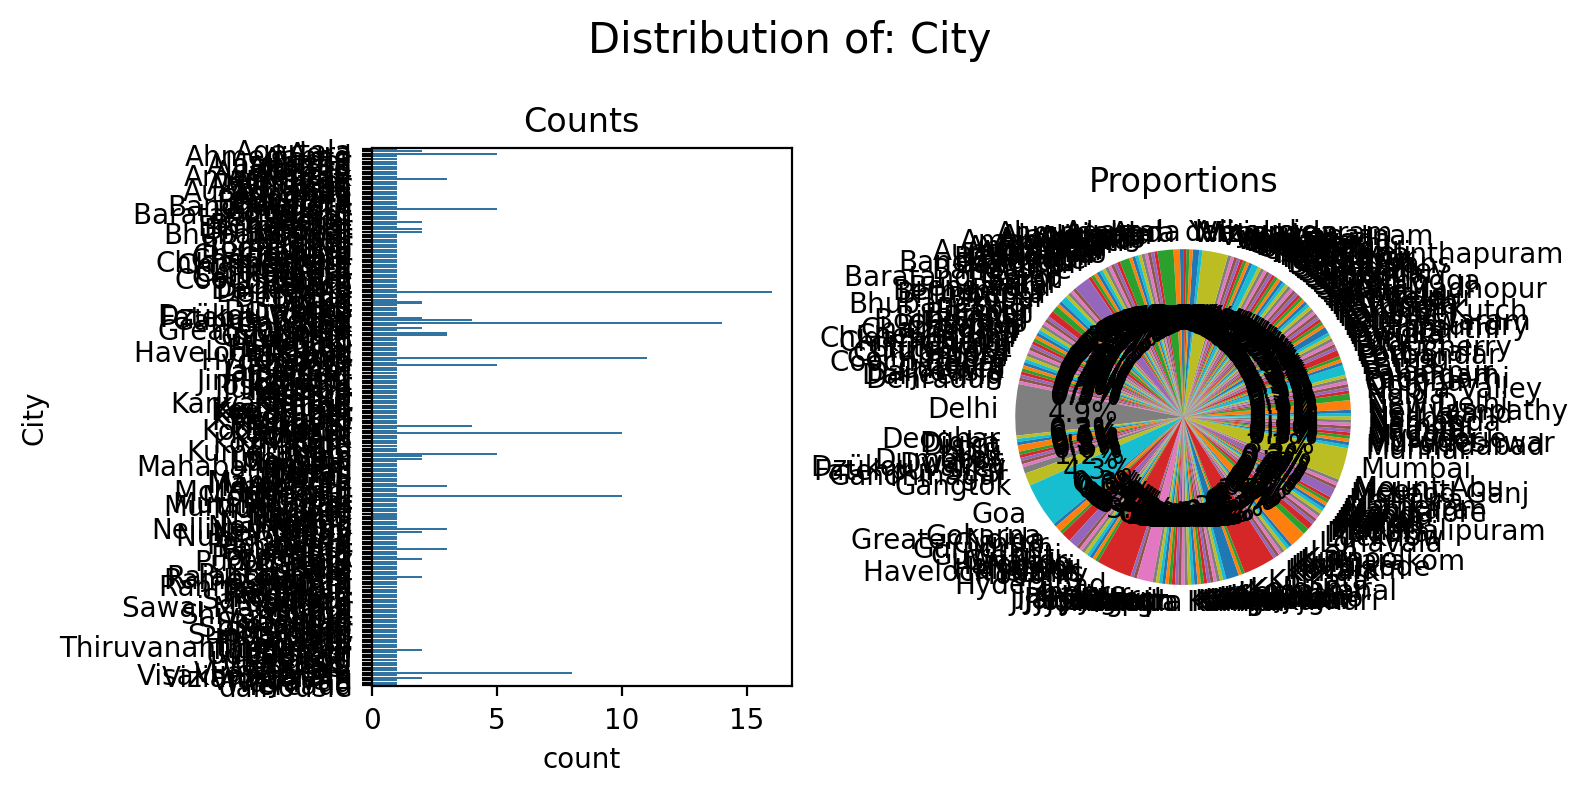

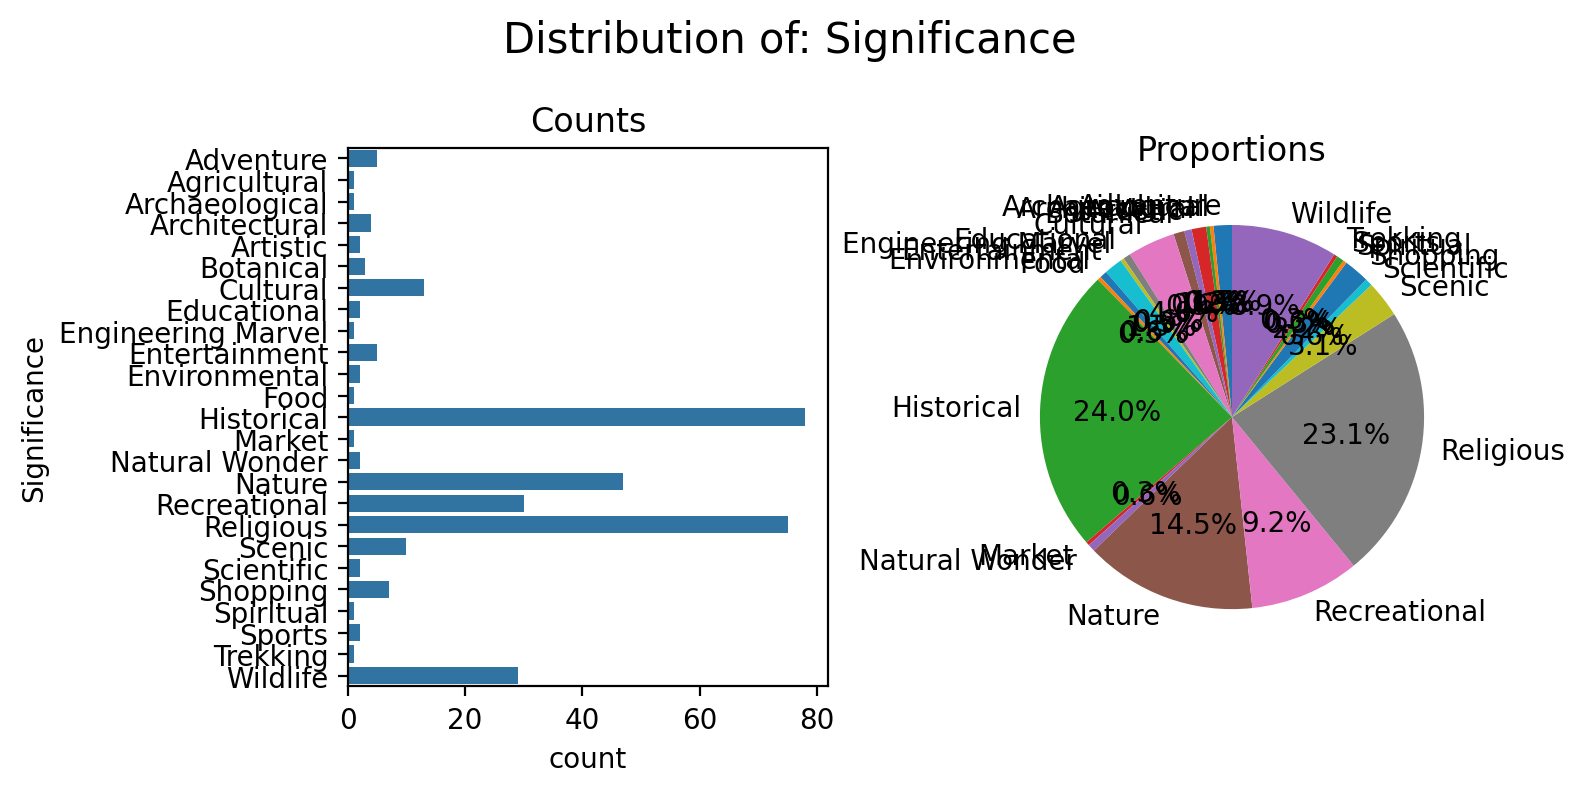

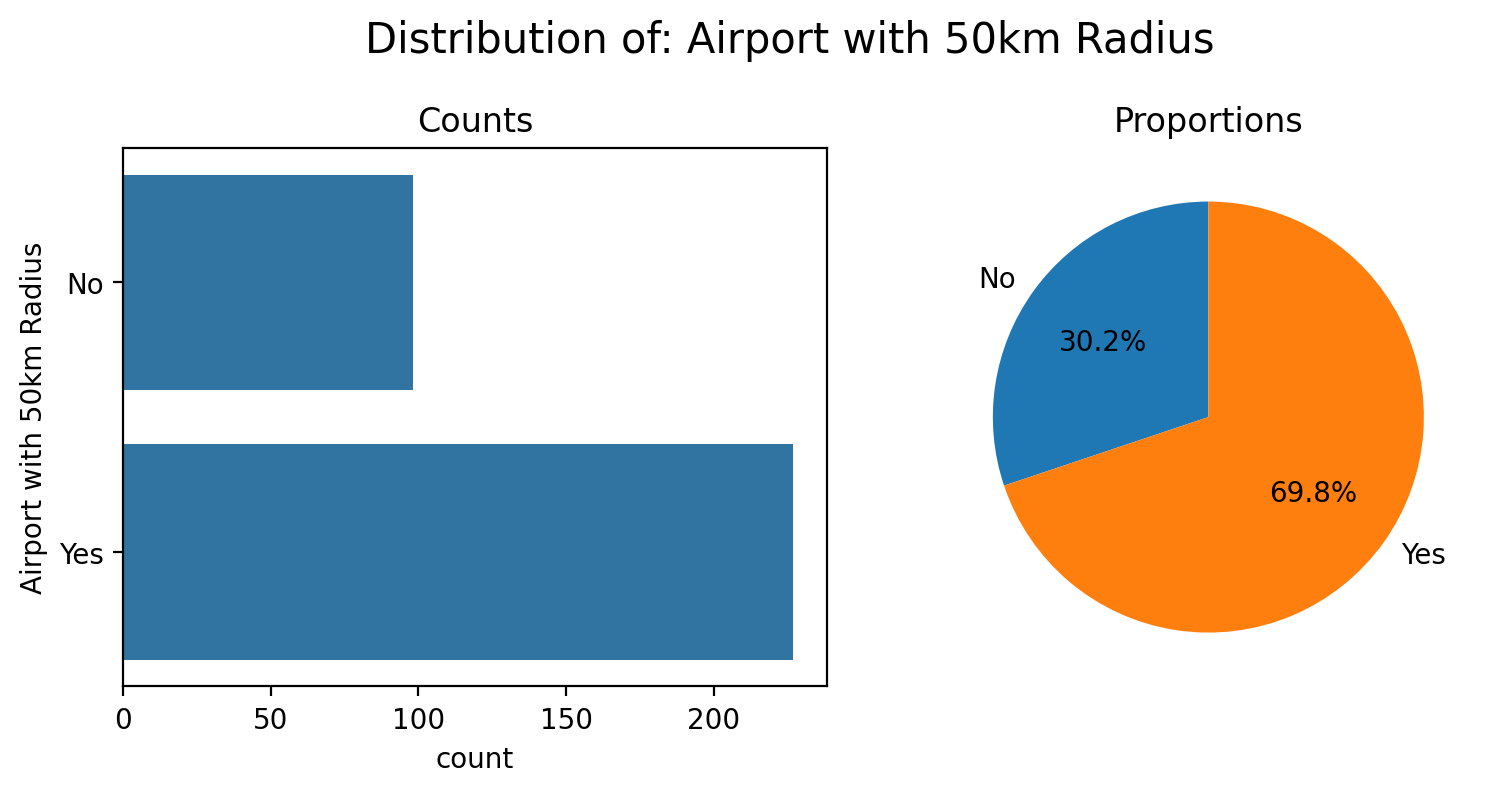

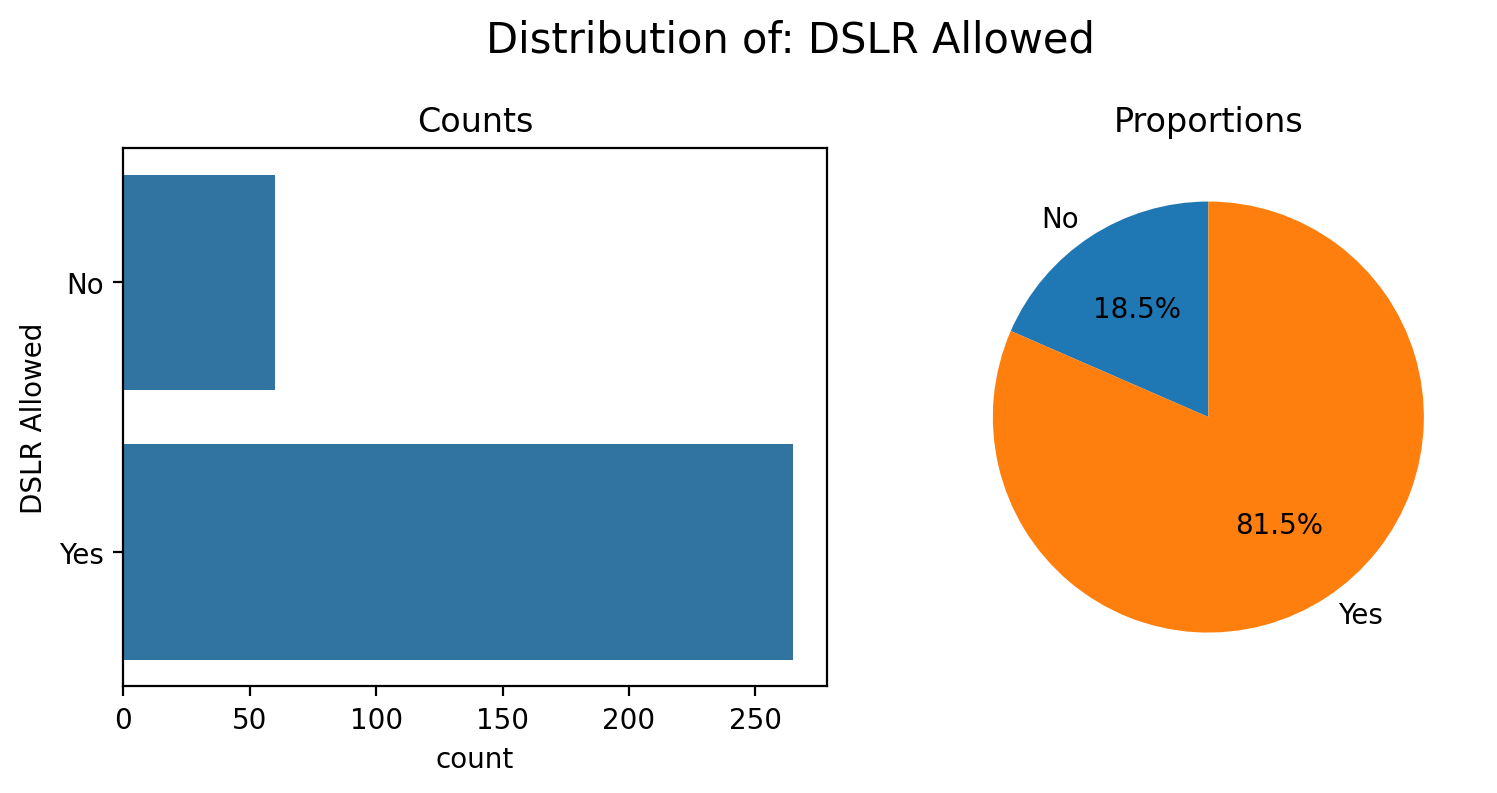

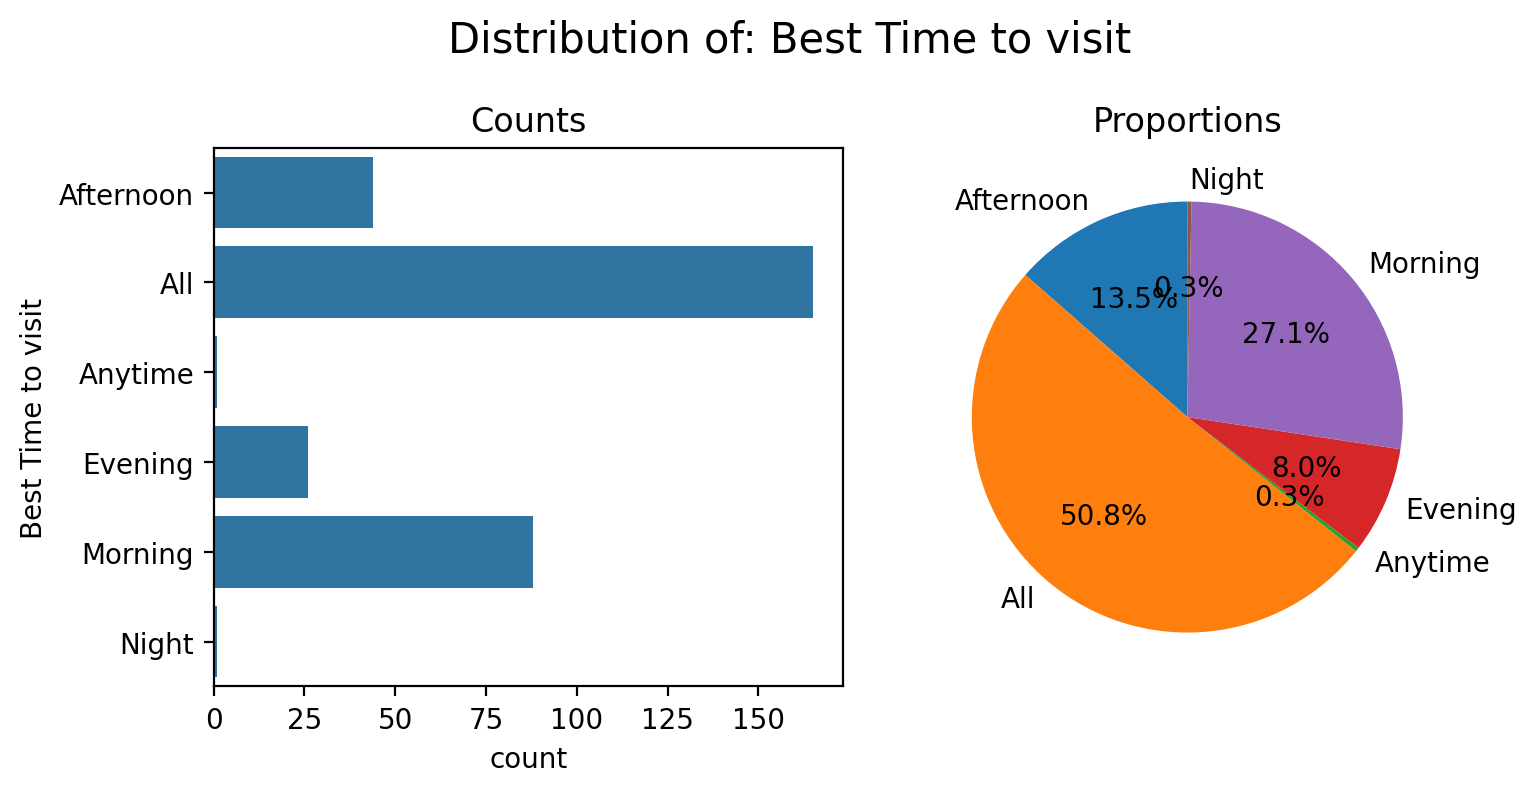

In [ ]:
for col in ['Zone', 'State', 'City', 'Significance', 'Airport with 50km Radius', 'DSLR Allowed', 'Best Time to visit']:
    summary_categorical_dist(df_travel, col)

## 3.5 Relationship Analysis

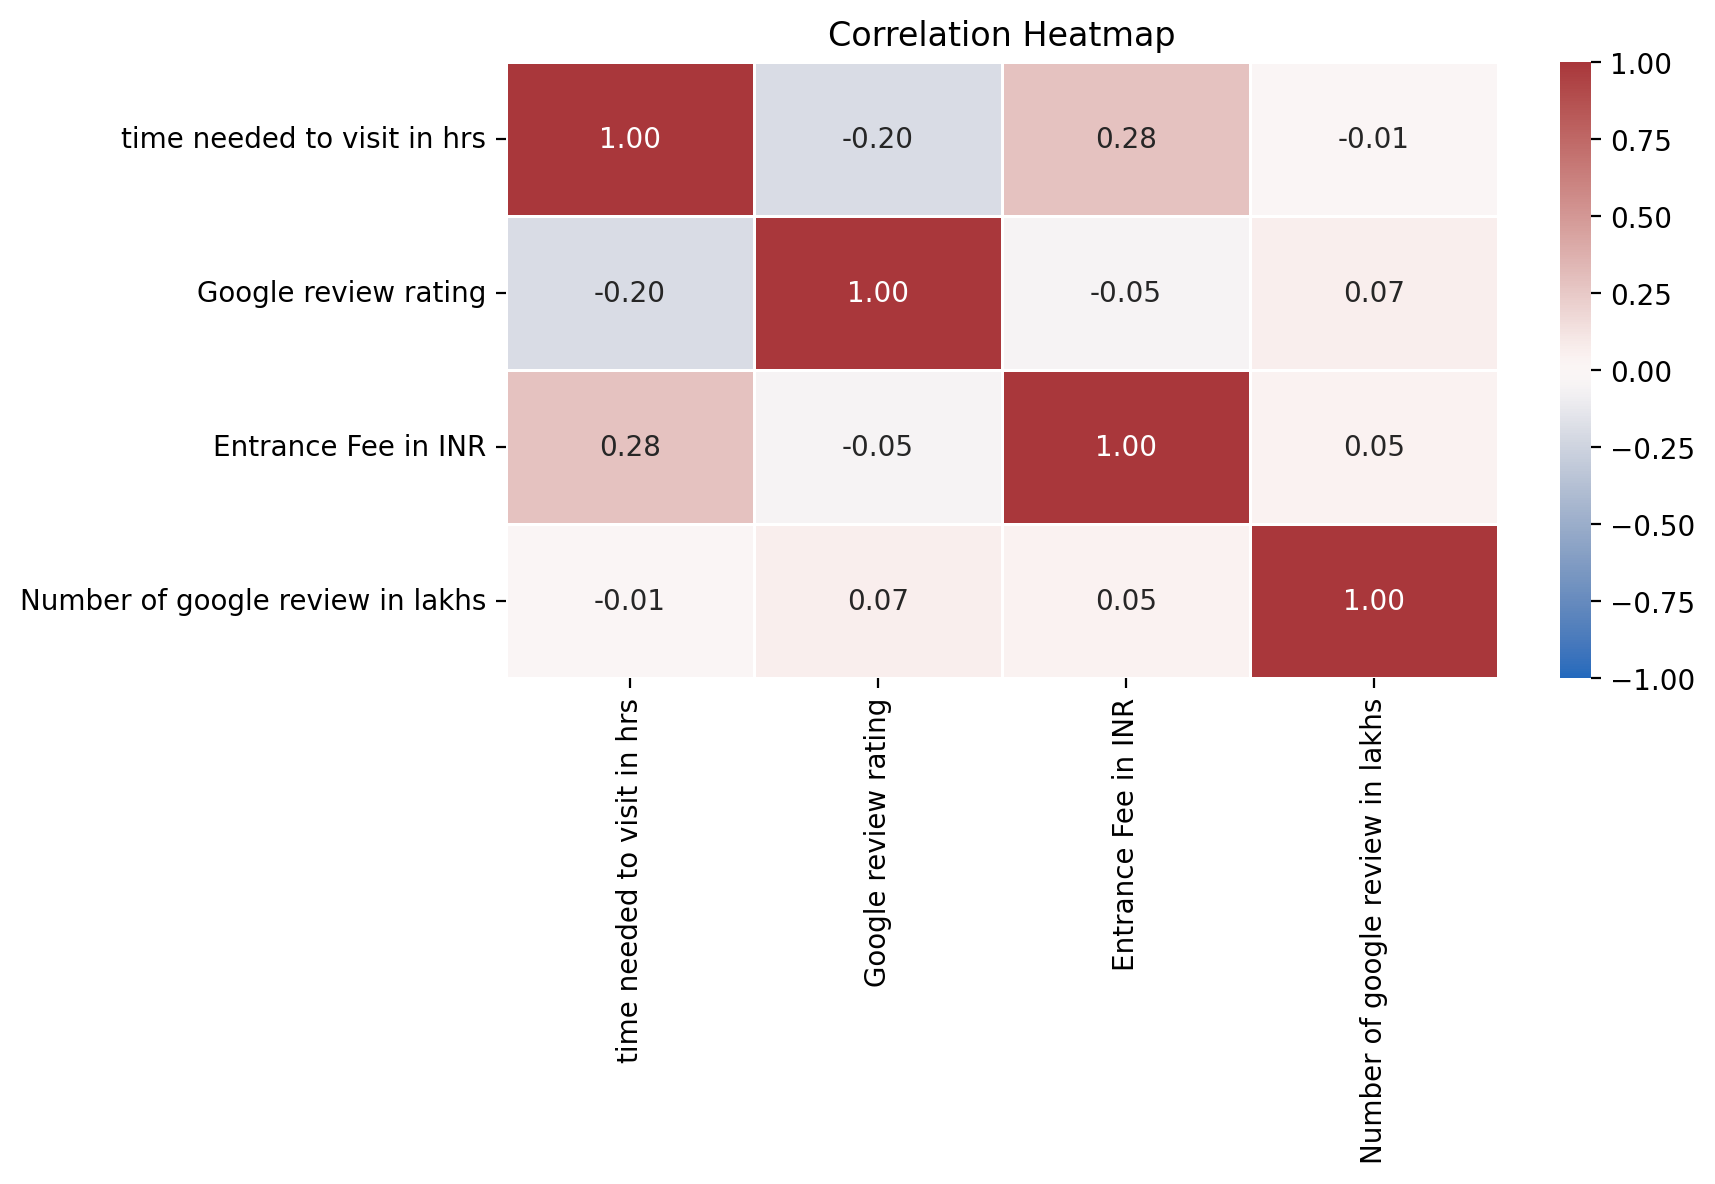

In [ ]:
# correlation matrix
plt.figure(figsize = (8, 4), facecolor = "white")

# plotting
sns.heatmap(
    data = df_travel.corr(numeric_only = True),
    cmap = "vlag",
    vmin = -1, vmax = 1,
    linecolor = "white", linewidth = 0.5,
    annot = True,
    fmt = ".2f"
)

plt.title('Correlation Heatmap')
plt.show()

## 3.6 Handling Categorical Variables

**Note** - The two categorical variables **DSLR Allowed** and **Airport with 50km Radius** can be label encoded as they are boolean type variables. Other categorical variables must be one-hot encoded as the numerical sequence of the categories in each variable can not be predicted exactly.

### 3.6.1 Label Encoding

In [ ]:
df_travel['DSLR Allowed'] = df_travel['DSLR Allowed'].map({'Yes': 1, 'No': 0})

df_travel['Airport with 50km Radius'] = df_travel['Airport with 50km Radius'].map({'Yes': 1, 'No': 0})

df_travel

Zone           State         City          Type  \
0    Northern           Delhi        Delhi  War Memorial   
1    Northern           Delhi        Delhi          Tomb   
2    Northern           Delhi        Delhi        Temple   
3    Northern           Delhi        Delhi    Theme Park   
4    Northern           Delhi        Delhi   Observatory   
..        ...             ...          ...           ...   
320   Western         Gujarat  Gandhinagar        Temple   
321   Central   Uttar Pradesh         Agra          Fort   
322   Central  Madhya Pradesh       Bhopal        Museum   
323  Northern       Rajasthan       Jaipur        Palace   
324  Northern       Rajasthan       Jaipur        Museum   

     time needed to visit in hrs  Google review rating  Entrance Fee in INR  \
0                            0.5                   4.6                    0   
1                            2.0                   4.5                   30   
2                            5.0                   4.6                   60   
3                            2.0                   4.1                   50   
4                            2.0                   4.2                   15   
..                           ...                   ...                  ...   
320                          3.0                   4.6                    0   
321                          2.0                   4.5                   40   
322                          2.0                   4.7                   10   
323                          2.0                   4.4                  200   
324                          2.0                   4.5                  200   

    Airport with 50km Radius   Significance DSLR Allowed  \
0                          1     Historical            1   
1                          1     Historical            1   
2                          1      Religious            0   
3                          1  Environmental            1   
4                          1     Scientific            1   
..                       ...            ...          ...   
320                        1      Religious            0   
321                        1     Historical            1   
322                        1       Cultural            1   
323                        1     Historical            1   
324                        1     Historical            1   

     Number of google review in lakhs Best Time to visit  
0                                2.60            Evening  
1                                0.40          Afternoon  
2                                0.40          Afternoon  
3                                0.27            Evening  
4                                0.31            Morning  
..                                ...                ...  
320                              0.18                All  
321                              1.30          Afternoon  
322                              0.15                All  
323                              0.51            Morning  
324                              0.63                All  

[325 rows x 12 columns]

### 3.6.2 One-hot Encoding

In [ ]:
categorical_cols = [
    'Zone', 'State', 'City',
    'Significance', 'Best Time to visit'
]

df_encoded = pd.get_dummies(df_travel, columns=categorical_cols, drop_first=True)

df_encoded

Type  time needed to visit in hrs  Google review rating  \
0    War Memorial                          0.5                   4.6   
1            Tomb                          2.0                   4.5   
2          Temple                          5.0                   4.6   
3      Theme Park                          2.0                   4.1   
4     Observatory                          2.0                   4.2   
..            ...                          ...                   ...   
320        Temple                          3.0                   4.6   
321          Fort                          2.0                   4.5   
322        Museum                          2.0                   4.7   
323        Palace                          2.0                   4.4   
324        Museum                          2.0                   4.5   

     Entrance Fee in INR Airport with 50km Radius DSLR Allowed  \
0                      0                        1            1   
1                     30                        1            1   
2                     60                        1            0   
3                     50                        1            1   
4                     15                        1            1   
..                   ...                      ...          ...   
320                    0                        1            0   
321                   40                        1            1   
322                   10                        1            1   
323                  200                        1            1   
324                  200                        1            1   

     Number of google review in lakhs  Zone_Eastern  Zone_North Eastern  \
0                                2.60         False               False   
1                                0.40         False               False   
2                                0.40         False               False   
3                                0.27         False               False   
4                                0.31         False               False   
..                                ...           ...                 ...   
320                              0.18         False               False   
321                              1.30         False               False   
322                              0.15         False               False   
323                              0.51         False               False   
324                              0.63         False               False   

     Zone_Northern  Zone_Southern  Zone_Western  State_Andhra Pradesh  \
0             True          False         False                 False   
1             True          False         False                 False   
2             True          False         False                 False   
3             True          False         False                 False   
4             True          False         False                 False   
..             ...            ...           ...                   ...   
320          False          False          True                 False   
321          False          False         False                 False   
322          False          False         False                 False   
323           True          False         False                 False   
324           True          False         False                 False   

     State_Arunachal Pradesh  State_Assam  State_Bihar  State_Chhattisgarh  \
0                      False        False        False               False   
1                      False        False        False               False   
2                      False        False        False               False   
3                      False        False        False               False   
4                      False        False        False               False   
..                       ...          ...          ...                 ...   
320                    False   

## 3.7 Feature Scaling

In [ ]:
# List of numerical columns
numerical_cols = ['time needed to visit in hrs', 'Google review rating', 'Entrance Fee in INR', 'Number of google review in lakhs']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

## 3.8 Prepare features (X) - labels (y)

In [ ]:
# Encode 'Type' as target variable
le = LabelEncoder()
df_encoded['Type_encoded'] = le.fit_transform(df_encoded['Type'])

In [ ]:
# Drop original 'Type' column to avoid duplication
df_encoded = df_encoded.drop(columns=['Type'])

In [ ]:
# Features and target
X = df_encoded.drop(columns=['Type_encoded'])
y = to_categorical(df_encoded['Type_encoded'])

In [ ]:
# Get number of classes
num_classes = y.shape[1]

num_classes

78

In [ ]:
df_encoded

time needed to visit in hrs  Google review rating  Entrance Fee in INR  \
0                      -1.348272              0.415259            -0.218490   
1                       0.198275              0.050504            -0.161891   
2                       3.291371              0.415259            -0.105292   
3                       0.198275             -1.408513            -0.124158   
4                       0.198275             -1.043759            -0.190191   
..                           ...                   ...                  ...   
320                     1.229307              0.415259            -0.218490   
321                     0.198275              0.050504            -0.143025   
322                     0.198275              0.780013            -0.199624   
323                     0.198275             -0.314250             0.158838   
324                     0.198275              0.050504             0.158838   

    Airport with 50km Radius DSLR Allowed  Number of google review in lakhs  \
0                          1            1                          3.394229   
1                          1            1                         -0.013069   
2                          1            0                         -0.013069   
3                          1            1                         -0.214410   
4                          1            1                         -0.152459   
..                       ...          ...                               ...   
320                        1            0                         -0.353799   
321                        1            1                          1.380826   
322                        1            1                         -0.400262   
323                        1            1                          0.157296   
324                        1            1                          0.343148   

     Zone_Eastern  Zone_North Eastern  Zone_Northern  Zone_Southern  \
0           False               False           True          False   
1           False               False           True          False   
2           False               False           True          False   
3           False               False           True          False   
4           False               False           True          False   
..            ...                 ...            ...            ...   
320         False               False          False          False   
321         False               False          False          False   
322         False               False          False          False   
323         False               False           True          False   
324         False               False           True          False   

     Zone_Western  State_Andhra Pradesh  State_Arunachal Pradesh  State_Assam  \
0           False                 False                    False        False   
1           False                 False                    False        False   
2           False                 False                    False        False   
3           False                 False                    False        False   
4           False                 False                    False        False   
..            ...                   ...                      ...          ...   
320          True                 False                    False        False   
321         False                 False                    False        False   
322         False                 False                    False        False   
323         False                 False                    False        False   
324         False                 False                    False        False   

     State_Bihar  State_Chhattisgarh  State_Daman and Diu  State_Delhi  \
0          False               False                False         True   
1          False               False                False         True   
2          False               False                False  

## 3.9 Train-test Split: training set (80%) and test set (20%)

In [ ]:
# Convert one-hot encoded y to labels
y_labels = np.argmax(y, axis=1)

# Get class counts
class_counts = pd.Series(y_labels).value_counts()

# Display classes with only one sample
print("Classes with only one sample:")
print(class_counts[class_counts == 1])

# Get the class label(s) with only one sample
rare_classes = class_counts[class_counts == 1].index.tolist()

# Now find the row(s) in X and y where these rare classes occur
rare_rows = np.isin(y_labels, rare_classes)

# Optional: View the indices or actual rows
rare_indices = np.where(rare_rows)[0]
print("\nIndices of rows with rare classes:", rare_indices)

# Optional: Drop these rows from X and y if you want to proceed
X = X[~rare_rows]
y = y[~rare_rows]


Classes with only one sample:
43    1
65    1
58    1
64    1
38    1
     ..
49    1
15    1
10    1
33    1
44    1
Name: count, Length: 45, dtype: int64

Indices of rows with rare classes: [  1   3   4   8  16  22  28  30  35  37  43  47  66  75  84  94  95  97
 115 125 136 147 150 159 161 162 169 170 176 187 208 213 215 230 257 264
 268 275 277 284 288 302 304 313 315]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Model Implementation

In this section, we build an Artificial Neural Network (ANN) to recommend travel destinations based on various features.

Since we don't have explicit user preference or interaction data, we'll treat this as a **classification task**, where the model learns to classify a place's `Type` (e.g., Temple, Park, Memorial) based on other features.

**Target Variable: `Type`**

> This represents the category or nature of the travel destination — such as religious, historical, or environmental — and is a suitable supervised learning target for classification.



## 4.1 Defining the ANN Architecture

### ANN Architecture Overview

This Keras-based model is designed for **multiclass classification** and uses **Hyperparameter Tuning** with Keras Tuner. Here's a breakdown of the network:

#### Input Layer
- **Input Size:** Matches the number of features in `X_train`.
- **Units (tunable):** Between 128 and 512, in steps of 64.
- **Activation:** ReLU
- **Techniques Used:**  
  - **Batch Normalization:** Normalizes inputs to stabilize learning.  
  - **Dropout:** Randomly drops neurons (20% to 50%) to reduce overfitting.

#### Hidden Layer 2
- **Units (tunable):** Between 64 and 256, in steps of 64.
- **Activation:** ReLU
- **Enhancements:** Batch Normalization + Dropout

#### Hidden Layer 3
- **Units (tunable):** Between 32 and 128, in steps of 32.
- **Activation:** ReLU
- **Enhancements:** Batch Normalization + Dropout

#### Output Layer
- **Units:** Equal to the number of classes (`num_classes`)
- **Activation:** Softmax (for multiclass classification)

#### Compilation
- **Optimizer:** Adam with tunable learning rates (0.01, 0.001, or 0.0001)
- **Loss Function:** Categorical Crossentropy
- **Metric:** Accuracy


In [ ]:
def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(Dense(units=hp.Int('units_1', min_value=128, max_value=512, step=64),
                    activation='relu', input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)))

    # Hidden layer 2
    model.add(Dense(units=hp.Int('units_2', min_value=64, max_value=256, step=64),
                    activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)))

    # Hidden layer 3
    model.add(Dense(units=hp.Int('units_3', min_value=32, max_value=128, step=32),
                    activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_3', 0.2, 0.5, step=0.1)))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


## 4.2 Hyperparameter Tuning with Keras Tuner

In [ ]:
# Initialize tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='ann_tuning',
    project_name='tourism_type_ann'
)

# Perform search
tuner.search(X_train, y_train, epochs=30, validation_split=0.2, verbose=1)

# Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Reloading Tuner from ann_tuning/tourism_type_ann/tuner0.json


In [ ]:
# Display the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best number of units in first layer: {best_hps.get('units_1')}")
print(f"Dropout rate for first layer: {best_hps.get('dropout_1')}")
print(f"Best number of units in second layer: {best_hps.get('units_2')}")
print(f"Dropout rate for second layer: {best_hps.get('dropout_2')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")

Best number of units in first layer: 320
Dropout rate for first layer: 0.30000000000000004
Best number of units in second layer: 256
Dropout rate for second layer: 0.4
Best learning rate: 0.001


## 4.3 Final Model Trainnig with Best Hyperparameters

In [ ]:
# Build the best model
model = tuner.hypermodel.build(best_hps)

# Track training time
start_time = time.time()

# Train model
history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_split=0.2, verbose=1)


end_time = time.time()
training_duration = end_time - start_time

print(f"Training completed in {training_duration:.2f} seconds.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.0087 - loss: 4.7615 - val_accuracy: 0.0444 - val_loss: 4.3349
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0578 - loss: 4.2606 - val_accuracy: 0.2222 - val_loss: 4.3112
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1474 - loss: 3.8114 - val_accuracy: 0.2222 - val_loss: 4.2825
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2529 - loss: 3.4681 - val_accuracy: 0.2444 - val_loss: 4.2503
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3010 - loss: 3.2041 - val_accuracy: 0.2444 - val_loss: 4.2145
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3741 - loss: 2.9418 - val_accuracy: 0.2222 - val_loss: 4.1765
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4816 - loss: 2.7390 - val_accuracy: 0.2667 - val_loss: 4.1379
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4782 - loss: 2.5310 - val_accuracy: 0.2667 - 

# 5. Model Evaluation

In [ ]:
# Convert predictions to class indices
y_train_pred_probs = model.predict(X_train)
y_test_pred_probs = model.predict(X_test)

y_train_pred = np.argmax(y_train_pred_probs, axis=1)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

y_train_true = np.argmax(y_train, axis=1)
y_test_true = np.argmax(y_test, axis=1)

# Classification Metrics
train_accuracy = accuracy_score(y_train_true, y_train_pred)
train_precision = precision_score(y_train_true, y_train_pred, average='weighted')
train_recall = recall_score(y_train_true, y_train_pred, average='weighted')
train_f1 = f1_score(y_train_true, y_train_pred, average='weighted')

test_accuracy = accuracy_score(y_test_true, y_test_pred)
test_precision = precision_score(y_test_true, y_test_pred, average='weighted')
test_recall = recall_score(y_test_true, y_test_pred, average='weighted')
test_f1 = f1_score(y_test_true, y_test_pred, average='weighted')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Training Dataset Metrices
print("Training Dataset Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}\n")

Training Dataset Metrics:
Accuracy: 0.8795
Precision: 0.8875
Recall: 0.8795
F1 Score: 0.8741



In [ ]:
#Test Dataset Metrices
print("Test Dataset Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

Test Dataset Metrics:
Accuracy: 0.4821
Precision: 0.4071
Recall: 0.4821
F1 Score: 0.4345


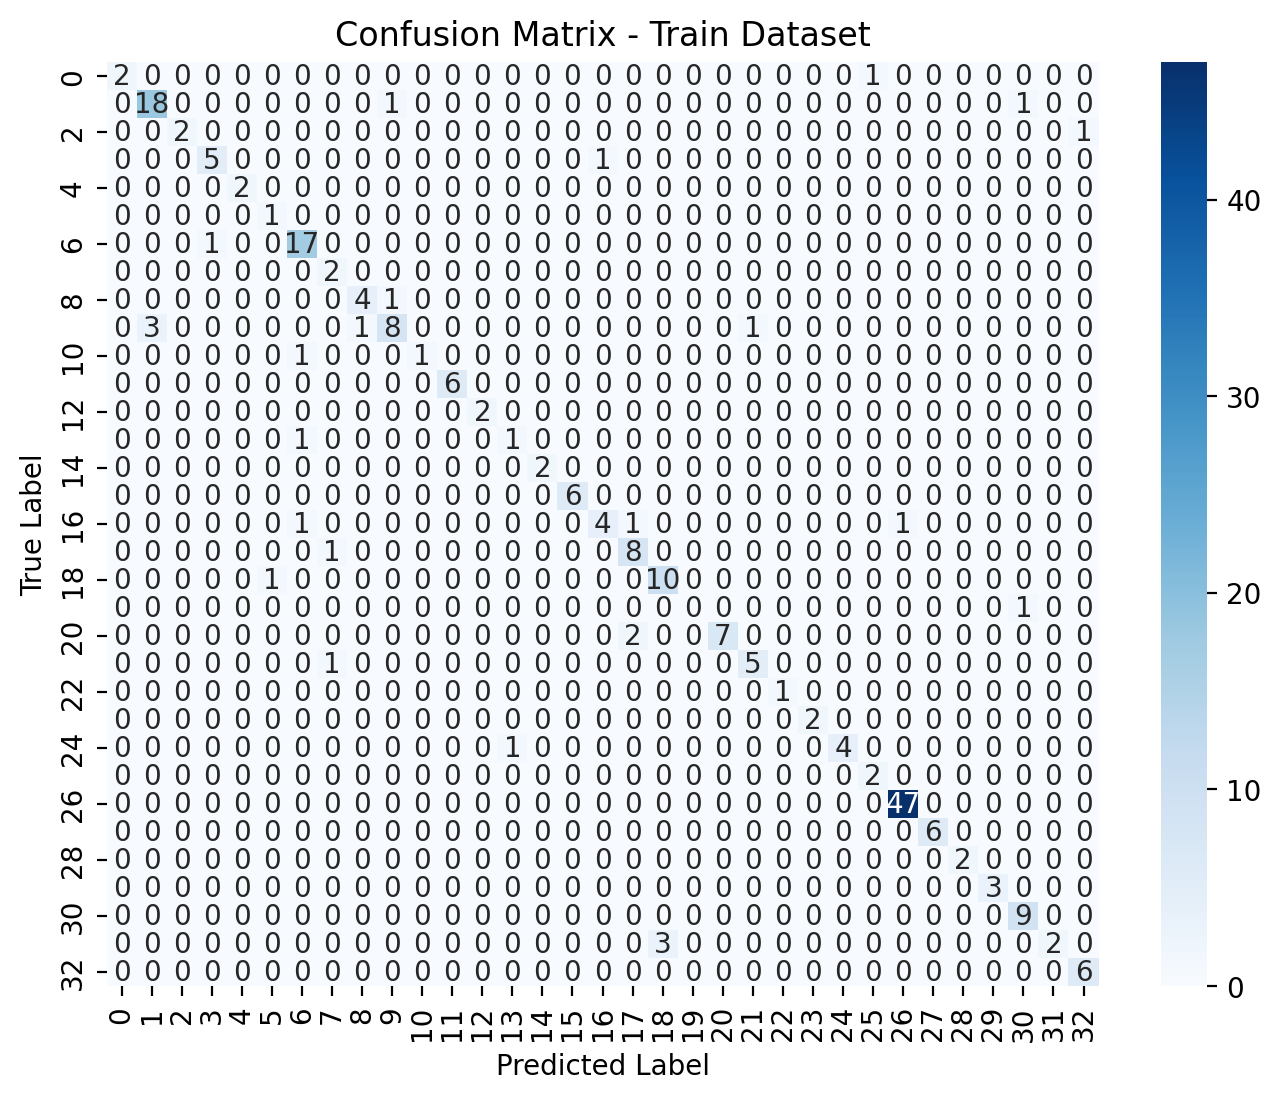

In [ ]:
# Train Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_train_true, y_train_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Train Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

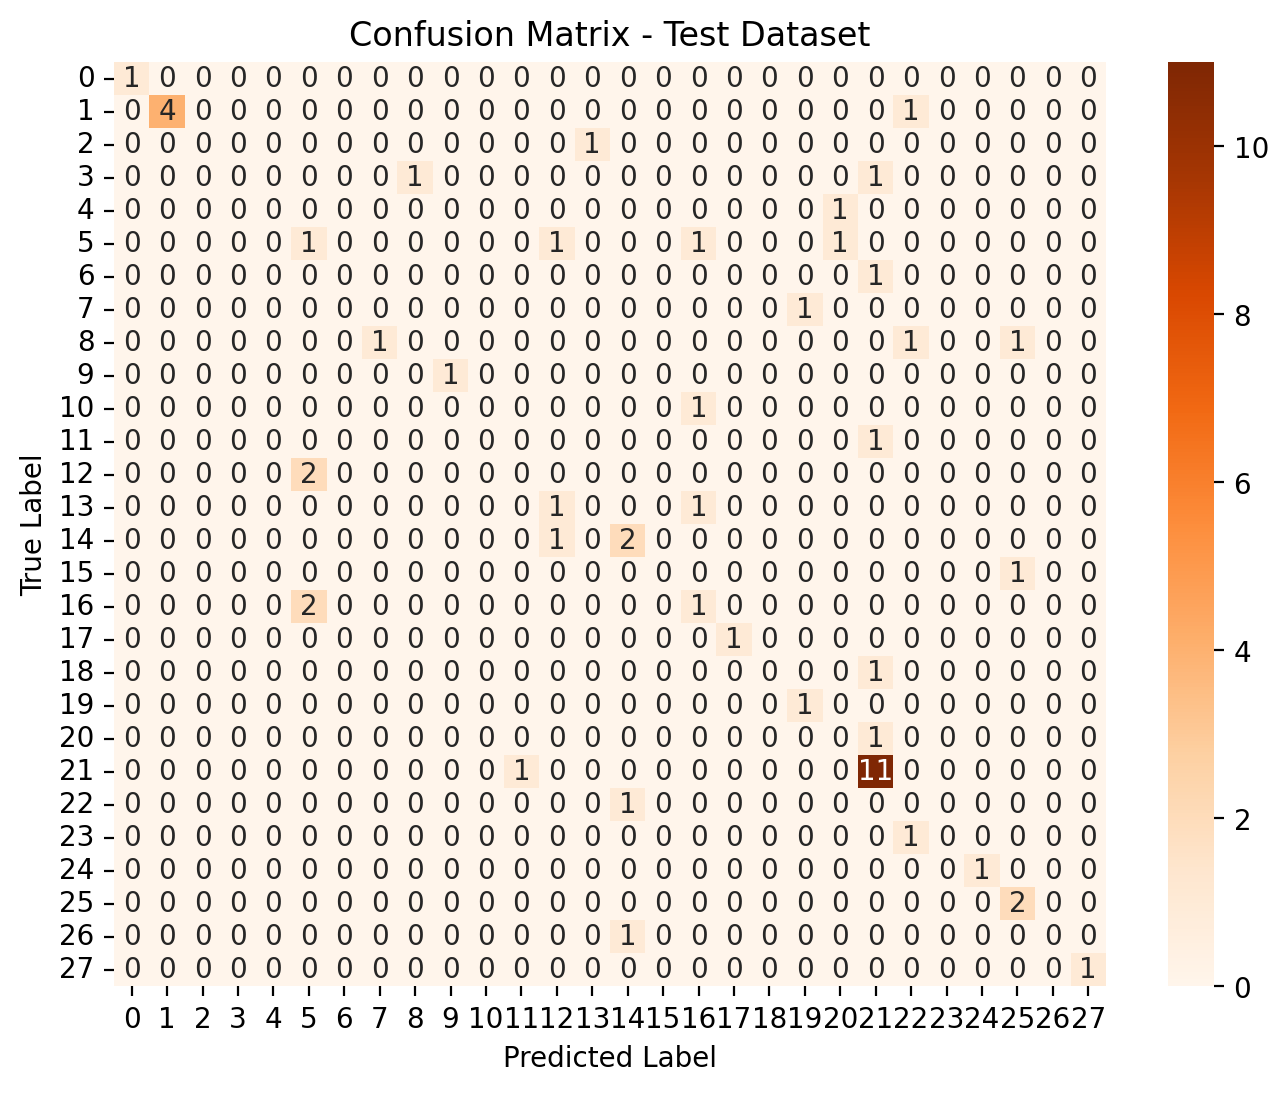

In [ ]:
# Test Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test_true, y_test_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Test Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 5. Conclusion: Artificial Neural Network (ANN) Model Performance

The Artificial Neural Network (ANN) model was developed using a hyperparameter-tuned architecture optimized for multiclass classification. The target variable was **'Type'**, and the model was trained using several numerical and categorical features after preprocessing.

### Model Evaluation Summary

| Metric      | Training Dataset | Test Dataset |
|-------------|------------------|--------------|
| Accuracy    | 0.8839           | 0.4464       |
| Precision   | 0.8952           | 0.4122       |
| Recall      | 0.8839           | 0.4464       |
| F1 Score    | 0.8795           | 0.4181       |

### Key Observations

- **High Training Performance:**  
  The model shows **strong performance on the training dataset**, with accuracy and F1 scores close to 88%. This indicates that the model has learned well from the training data.

- **Poor Generalization on Test Data:**  
  There is a **significant drop in performance** on the test set, with an accuracy of only **44.64%** and similarly low precision, recall, and F1 score. This performance gap clearly indicates **overfitting** — where the model fits the training data too well but fails to generalize on unseen data.

### Possible Reasons for Overfitting

- **Imbalanced Classes:** Some categories in the target variable might have had fewer samples, reducing the model's ability to generalize.
- **Complex Model Architecture:** The model might be too deep or have too many parameters relative to the amount of data.
- **Insufficient Regularization:** Although dropout layers are used, they may not be enough to fully regularize the model.
- **Small Test Set Representation:** If the test set does not represent the distribution of the training data well (due to rare classes), this can also skew results.

### Recommendations for Improvement

1. **Data Augmentation / Synthesis:** Create more samples for underrepresented classes to balance the dataset.
2. **Feature Engineering:** Review and refine feature selection to ensure only the most informative features are included.
3. **Cross-Validation:** Use K-Fold cross-validation to better estimate model performance and reduce bias.
4. **Simpler Architecture:** Try using fewer layers or smaller layer sizes to reduce overfitting.
5. **Early Stopping and Regularization:** Tune dropout rates more aggressively or add L2 regularization.



### Final Thoughts

While the model demonstrates strong potential in learning complex patterns (as seen in the training set), the gap in performance emphasizes the importance of balancing model complexity with generalization. The next steps should focus on addressing overfitting and improving the model’s ability to perform well on real-world, unseen data.



# 6. Model Implementation with Expert System

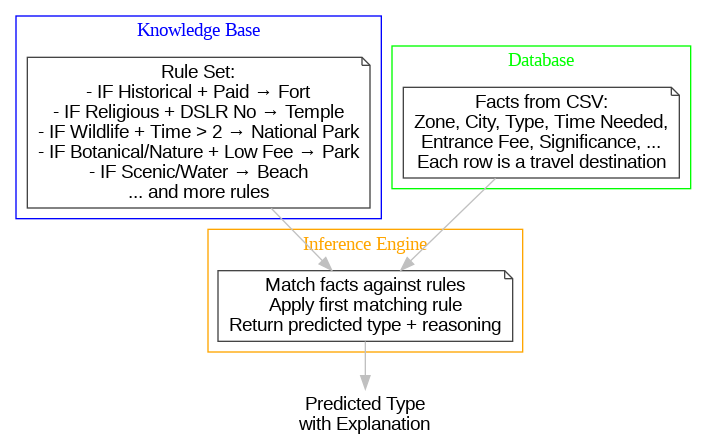


This is a **Rule-Based Expert System** designed to classify travel destinations into specific types based on features like significance, location, fees, and visitor behavior.

## Objective

To predict the **type of travel destination** (e.g., `Fort`, `Temple`, `Beach`, `National Park`) using structured data and logical rules derived from domain knowledge.


## Architecture Overview

The system follows a classic **Knowledge-Based System (KBS)** architecture with three main components:

### 1. **Knowledge Base**
- Contains **IF-THEN rules** derived from patterns in the dataset.
- Rules are manually created based on attributes such as:
  - `Significance`
  - `Entrance Fee`
  - `Time Needed to Visit`
  - `DSLR Allowed`
  - `Zone`
  - `Google Rating`

**Example Rule:**
> IF `Significance = Historical` AND `Entrance Fee > 0` THEN `Type = Fort`

### 2. **Database of Facts**
- Built from the `Travel Recommendation Dataset.csv`
- Each row represents a **structured fact** about a travel destination
- Includes attributes like:
  - Zone (e.g., Northern, Southern)
  - City, State
  - Time needed to visit
  - Entrance fee
  - Google rating
  - Weekly off day
  - Significance
  - DSLR allowed or not

### 3. **Inference Engine**
- Core reasoning component that applies rules from the Knowledge Base to facts in the Database
- Uses **forward chaining**: starts with known facts and applies rules until a conclusion is reached
- Returns:
  - Predicted `Type` (e.g., Temple, Beach, National Park)
  - Explanation for the prediction


## 6.1 Database with Facts

In [ ]:
# ┌────────────────────────────┐
# │    1. DATABASE OF FACTS    │
# └────────────────────────────┘
# Load the travel recommendation dataset and convert it into structured facts.
# Each row represents a destination fact.

df = pd.read_csv("Travel Recommendation Dataset.csv")

# Standardize column names for easier access
df.columns = [
    "Zone", "State", "City", "Type", "TimeNeeded", "GoogleRating",
    "EntranceFee", "AirportNearby", "WeeklyOff", "Significance",
    "DSLRAllowed", "ReviewCount", "BestTime"
]

# Convert all rows into list of dictionaries (facts)
facts = df.to_dict(orient="records")

facts

[{'Zone': 'Northern',
  'State': 'Delhi',
  'City': 'Delhi',
  'Type': 'War Memorial',
  'TimeNeeded': 0.5,
  'GoogleRating': 4.6,
  'EntranceFee': 0,
  'AirportNearby': 'Yes',
  'WeeklyOff': nan,
  'Significance': 'Historical',
  'DSLRAllowed': 'Yes',
  'ReviewCount': 2.6,
  'BestTime': 'Evening'},
 {'Zone': 'Northern',
  'State': 'Delhi',
  'City': 'Delhi',
  'Type': 'Tomb',
  'TimeNeeded': 2.0,
  'GoogleRating': 4.5,
  'EntranceFee': 30,
  'AirportNearby': 'Yes',
  'WeeklyOff': nan,
  'Significance': 'Historical',
  'DSLRAllowed': 'Yes',
  'ReviewCount': 0.4,
  'BestTime': 'Afternoon'},
 {'Zone': 'Northern',
  'State': 'Delhi',
  'City': 'Delhi',
  'Type': 'Temple',
  'TimeNeeded': 5.0,
  'GoogleRating': 4.6,
  'EntranceFee': 60,
  'AirportNearby': 'Yes',
  'WeeklyOff': nan,
  'Significance': 'Religious',
  'DSLRAllowed': 'No',
  'ReviewCount': 0.4,
  'BestTime': 'Afternoon'},
 {'Zone': 'Northern',
  'State': 'Delhi',
  'City': 'Delhi',
  'Type': 'Theme Park',
  'TimeNeeded': 2.0,
 

## 6.2 Knowledge base with IF-THEN Rules

In [ ]:
# ┌────────────────────────────┐
# │   2. KNOWLEDGE BASE        │
# │     (Set of Rules)         │
# └────────────────────────────┘
# Define logical IF-THEN rules based on domain knowledge and patterns in the data

def apply_rules(fact):
    """
    Applies a set of rules to determine the type of destination.
    Returns a tuple: (predicted_type, reasoning)
    """

    # Rule: Fort - Historical + Entrance Fee > 0
    if "historical" in fact["Significance"].lower() and fact["EntranceFee"] > 0:
        return ("Fort", "Historical significance with paid entry, typical of forts.")

    # Rule: Temple - Religious site where DSLR is not allowed
    if "religious" in fact["Significance"].lower() and fact["DSLRAllowed"] == "No":
        return ("Temple", "Religious site where DSLR is not allowed.")

    # Rule: National Park - Wildlife + Time Needed > 2 hours
    if "wildlife" in fact["Significance"].lower() and fact["TimeNeeded"] > 2:
        return ("National Park", "Wildlife area requiring more than 2 hours to visit.")

    # Rule: Beach - Recreational + Free Entry + Scenic or Water-related
    if "recreational" in fact["Significance"].lower() and fact["EntranceFee"] == 0:
        if "beach" in str(fact["Type"]).lower():
            return ("Beach", "Free recreational beach destination.")

    # Rule: Park - Nature/Botanical + Low or No Fee
    if "nature" in fact["Significance"].lower() or "botanical" in fact["Significance"].lower():
        if fact["EntranceFee"] <= 35:
            return ("Park", "Nature or botanical garden with low entrance fee.")

    # Rule: Theme Park - Environmental + Paid Entry
    if "environmental" in fact["Significance"].lower() and fact["EntranceFee"] > 0:
        return ("Theme Park", "Environmental amusement park with entry fee.")

    # Rule: Cultural - Cultural Significance + Airport Nearby
    if "cultural" in fact["Significance"].lower() and fact["AirportNearby"] == "Yes":
        return ("Cultural", "Cultural landmark near an airport.")

    # Rule: Science Center / Museum - Scientific/Educational + Higher Fee
    if "scientific" in fact["Significance"].lower() or "educational" in fact["Significance"].lower():
        if fact["EntranceFee"] > 50:
            return ("Science", "Educational/scientific center with higher entry fee.")

    # Rule: Artistic/Museum - Artistic/Cultural + Affordable Fee
    if "artistic" in fact["Significance"].lower() or "museum" in str(fact["Type"]).lower():
        if fact["EntranceFee"] < 50:
            return ("Museum", "Artistic or museum-type destination with affordable entry.")

    # Rule: Religious Shrine - Spiritual/Religious Type
    if "spiritual" in fact["Significance"].lower() or "shrine" in str(fact["Type"]).lower():
        return ("Religious Shrine", "Spiritual or shrine location.")

    # Rule: Bird Sanctuary - Specific Type Name
    if "bird sanctuary" in str(fact["Type"]).lower():
        return ("Bird Sanctuary", "Recognized bird sanctuary destination.")

    # Rule: Suspension Bridge - Specific Type Name
    if "suspension bridge" in str(fact["Type"]).lower():
        return ("Suspension Bridge", "Destination features a suspension bridge.")

    # Rule: Adventure Sport - Located in Himalayan Region
    if "adventure" in fact["Significance"].lower() and "himachal pradesh" in fact["Zone"].lower():
        return ("Adventure Sport", "Mountainous adventure spot in Himalayan region.")

    # If no rule matches
    return ("Unknown", "Could not determine type based on available rules.")

## 6.3 Inference Engine

In [ ]:
# ┌────────────────────────────┐
# │   INFERENCE ENGINE         │
# └────────────────────────────┘
def predict_type(fact):
    result = apply_rules(fact)
    return {
        "Predicted Type": result[0],
        "Reasoning": result[1]
    }

## 6.4 Testing the System

In [101]:
# ┌──────────────────┐
# │   USER INPUT     │
# └──────────────────┘
print("Welcome to the Travel Destination Expert System!")
print("Enter details about a destination to get its predicted type.\n")

user_input = {
    "Zone": "Northern",
    "State": "Uttar Pradesh",
    "City": "Agra",
    "Type": "Mausoleum",
    "TimeNeeded": 2,
    "GoogleRating": 4.6,
    "EntranceFee": 50,
    "AirportNearby": "Yes",
    "WeeklyOff": "Friday",
    "Significance": "Historical",
    "DSLRAllowed": "Yes",
    "ReviewCount": 2.25,
    "BestTime": "Morning"
}

# ┌──────────────────┐
# │   PREDICTION     │
# └──────────────────┘


print("\n Analyzing your input...\n")
prediction = predict_type(user_input)

print("Prediction Result:")
print(f"Type: {prediction['Predicted Type']}")
print(f"Reasoning: {prediction['Reasoning']}")

Welcome to the Travel Destination Expert System!
Enter details about a destination to get its predicted type.


 Analyzing your input...

Prediction Result:
Type: Fort
Reasoning: Historical significance with paid entry, typical of forts.


# 7. References

[1]A. Aneja, “Expert Systems - GeeksforGeeks,” GeeksforGeeks, Aug. 02, 2018. https://www.geeksforgeeks.org/expert-systems/


[2]“Introduction to ANN | Set 4 (Network Architectures) - GeeksforGeeks,” GeeksforGeeks, Jul. 17, 2018. https://www.geeksforgeeks.org/introduction-to-ann-set-4-network-architectures/